# analizzare in che modo il livello di istruzione nazionale si rapporta alla qualità delle università di ciascuna nazione, confrontando i diversi dataset e classifiche a disposizione.

In [1]:
import pandas as pd
import seaborn as sns
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt
import numpy as np


# Data Discovery
first look at the data to understand how they are modeled

## ranks data

In [2]:
shanghai = pd.read_csv('shanghaiData.csv')
shanghai

world_rank                              university_name national_rank  \
0             1                           Harvard University             1   
1             2                      University of Cambridge             1   
2             3                          Stanford University             2   
3             4           University of California, Berkeley             3   
4             5  Massachusetts Institute of Technology (MIT)             4   
...         ...                                          ...           ...   
4892    401-500                        University of Trieste         11-20   
4893    401-500                       University of Zaragoza          9-13   
4894    401-500                        Utah State University       126-146   
4895    401-500              Vienna University of Technology           4-6   
4896    401-500                       Wake Forest University       126-146   

      total_score  alumni  award   hici     ns    pub   pcp  year  
0           100.0   100.0  100.0  100.0  100.0  100.0  72.4  2005  
1            73.6    99.8   93.4   53.3   56.6   70.9  66.9  2005  
2            73.4    41.1   72.2   88.5   70.9   72.3  65.0  2005  
3            72.8    71.8   76.0   69.4   73.9   72.2  52.7  2005  
4            70.1    74.0   80.6   66.7   65.8   64.3  53.0  2005  
...           ...     ...    ...    ...    ...    ...   ...   ...  
4892          NaN     0.0    0.0    5.0   10.9   25.1  20.1  2015  
4893          NaN     0.0    0.0    7.6    5.1   33.3  13.1  2015  
4894          NaN    13.6    0.0    3.6   10.8   25.1  15.5  2015  
4895          NaN     0.0    0.0    0.0   12.2   28.8  22.9  2015  
4896          NaN     0.0    0.0   14.9    7.5   25.0  11.9  2015  

[4897 rows x 11 columns]

In [3]:
times = pd.read_csv('timesData.csv')
times

world_rank                        university_name  \
0             1                     Harvard University   
1             2     California Institute of Technology   
2             3  Massachusetts Institute of Technology   
3             4                    Stanford University   
4             5                   Princeton University   
...         ...                                    ...   
2598    601-800                    Yeungnam University   
2599    601-800            Yıldız Technical University   
2600    601-800               Yokohama City University   
2601    601-800           Yokohama National University   
2602    601-800                     Yuan Ze University   

                       country  teaching international  research  citations  \
0     United States of America      99.7          72.4      98.7       98.8   
1     United States of America      97.7          54.6      98.0       99.9   
2     United States of America      97.8          82.3      91.4       99.9   
3     United States of America      98.3          29.5      98.1       99.2   
4     United States of America      90.9          70.3      95.4       99.9   
...                        ...       ...           ...       ...        ...   
2598               South Korea      18.6          24.3      10.9       26.5   
2599                    Turkey      14.5          14.9       7.6       19.3   
2600                     Japan      24.0          16.1      10.2       36.4   
2601                     Japan      20.1          23.3      16.0       13.5   
2602                    Taiwan      16.2          17.7      18.3       28.6   

     income total_score num_students  student_staff_ratio  \
0      34.5        96.1       20,152                  8.9   
1      83.7        96.0        2,243                  6.9   
2      87.5        95.6       11,074                  9.0   
3      64.3        94.3       15,596                  7.8   
4         -        94.2        7,929                  8.4   
...     ...         ...          ...                  ...   
2598   35.4           -       21,958                 15.3   
2599   44.0           -       31,268                 28.7   
2600   37.9           -        4,122                  3.7   
2601   40.4           -       10,117                 12.1   
2602   39.8           -        8,663                 20.6   

     international_students female_male_ratio  year  
0                       25%               NaN  2011  
1                       27%           33 : 67  2011  
2                       33%           37 : 63  2011  
3                       22%           42 : 58  2011  
4                       27%           45 : 55  2011  
...                     ...               ...   ...  
2598                     3%           48 : 52  2016  
2599                     2%           36 : 64  2016  
2600                     3%               NaN  2016  
2601                     8%           28 : 72  2016  
2602                     4%           43 : 57  2016  

[2603 rows x 14 columns]

In [4]:
arabia = pd.read_csv('cwurData.csv')
arabia

world_rank                            institution         country  \
0              1                     Harvard University             USA   
1              2  Massachusetts Institute of Technology             USA   
2              3                    Stanford University             USA   
3              4                University of Cambridge  United Kingdom   
4              5     California Institute of Technology             USA   
...          ...                                    ...             ...   
2195         996              University of the Algarve        Portugal   
2196         997                  Alexandria University           Egypt   
2197         998            Federal University of Ceará          Brazil   
2198         999                 University of A Coruña           Spain   
2199        1000        China Pharmaceutical University           China   

      national_rank  quality_of_education  alumni_employment  \
0                 1                     7                  9   
1                 2                     9                 17   
2                 3                    17                 11   
3                 1                    10                 24   
4                 4                     2                 29   
...             ...                   ...                ...   
2195              7                   367                567   
2196              4                   236                566   
2197             18                   367                549   
2198             40                   367                567   
2199             83                   367                567   

      quality_of_faculty  publications  influence  citations  broad_impact  \
0                      1             1          1          1           NaN   
1                      3            12          4          4           NaN   
2                      5             4          2          2           NaN   
3                      4            16         16         11           NaN   
4                      7            37         22         22           NaN   
...                  ...           ...        ...        ...           ...   
2195                 218           926        845        812         969.0   
2196                 218           997        908        645         981.0   
2197                 218           830        823        812         975.0   
2198                 218           886        974        812         975.0   
2199                 218           861        991        812         981.0   

      patents   score  year  
0           5  100.00  2012  
1           1   91.67  2012  
2          15   89.50  2012  
3          50   86.17  2012  
4          18   85.21  2012  
...       ...     ...   ...  
2195      816   44.03  2015  
2196      871   44.03  2015  
2197      824   44.03  2015  
2198      651   44.02  2015  
2199      547   44.02  2015  

[2200 rows x 14 columns]

In [5]:
# verifichiamo le informazioni dei dataset
shanghai.info()
print()
times.info()
print()
arabia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4897 entries, 0 to 4896
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   world_rank       4897 non-null   object 
 1   university_name  4896 non-null   object 
 2   national_rank    4896 non-null   object 
 3   total_score      1101 non-null   float64
 4   alumni           4896 non-null   float64
 5   award            4895 non-null   float64
 6   hici             4895 non-null   float64
 7   ns               4875 non-null   float64
 8   pub              4895 non-null   float64
 9   pcp              4895 non-null   float64
 10  year             4897 non-null   int64  
dtypes: float64(7), int64(1), object(3)
memory usage: 421.0+ KB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2603 entries, 0 to 2602
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   world_rank  

## Countries education data

In [6]:
attainment = pd.read_csv('educational_attainment_supplementary_data.csv')

In [7]:
expenditure = pd.read_csv('education_expenditure_supplementary_data.csv',  engine='python')

In [8]:
expenditure

country                  institute_type  \
0            OECD Average               All Institutions    
1               Australia               All Institutions    
2                 Austria               All Institutions    
3                 Belgium               All Institutions    
4                  Canada               All Institutions    
..                    ...                             ...   
328                Turkey  Higher Education Institutions    
329        United Kingdom  Higher Education Institutions    
330         United States  Higher Education Institutions    
331                Brazil  Higher Education Institutions    
332    Russian Federation  Higher Education Institutions    

    direct_expenditure_type  1995  2000  2005  2009  2010  2011  
0                    Public   4.9   4.9   5.0   5.4   5.4   5.3  
1                    Public   4.5   4.6   4.3   4.5   4.6   4.3  
2                    Public   5.3   5.4   5.2   5.7   5.6   5.5  
3                    Public   5.0   5.1   5.8   6.4   6.4   6.4  
4                    Public   5.8   5.2   4.8   5.0   5.2   NaN  
..                      ...   ...   ...   ...   ...   ...   ...  
328                   Total   NaN   NaN   NaN   NaN   NaN   NaN  
329                   Total   NaN   NaN   NaN   NaN   NaN   1.2  
330                   Total   NaN   NaN   NaN   NaN   NaN   2.7  
331                   Total   NaN   NaN   NaN   NaN   NaN   NaN  
332                   Total   NaN   NaN   NaN   NaN   NaN   1.4  

[333 rows x 9 columns]

In [9]:
attainment

country_name  \
0                                            Afghanistan   
1                                            Afghanistan   
2                                            Afghanistan   
3                                            Afghanistan   
4                                            Afghanistan   
...                                                  ...   
79050                                                NaN   
79051                                                NaN   
79052                                                NaN   
79053  Data from database: Education Statistics: Educ...   
79054                           Last Updated: 10/20/2015   

                                             series_name  1985  1986  1987  \
0      Barro-Lee: Average years of primary schooling,...  0.33   NaN   NaN   
1      Barro-Lee: Average years of primary schooling,...  1.03   NaN   NaN   
2      Barro-Lee: Average years of primary schooling,...  0.83   NaN   NaN   
3      Barro-Lee: Average years of primary schooling,...  2.34   NaN   NaN   
4      Barro-Lee: Average years of primary schooling,...  0.54   NaN   NaN   
...                                                  ...   ...   ...   ...   
79050                                                NaN   NaN   NaN   NaN   
79051                                                NaN   NaN   NaN   NaN   
79052                                                NaN   NaN   NaN   NaN   
79053                                                NaN   NaN   NaN   NaN   
79054                                                NaN   NaN   NaN   NaN   

       1990  1991  1992  1993  1995  1996  1997  1998  1999  2000  2001  2002  \
0      0.44   NaN   NaN   NaN  0.57   NaN   NaN   NaN   NaN  0.75   NaN   NaN   
1      1.26   NaN   NaN   NaN  1.54   NaN   NaN   NaN   NaN  2.01   NaN   NaN   
2      0.95   NaN   NaN   NaN  1.26   NaN   NaN   NaN   NaN  1.92   NaN   NaN   
3      2.22   NaN   NaN   NaN  2.37   NaN   NaN   NaN   NaN  3.83   NaN   NaN   
4      0.92   NaN   NaN   NaN  0.94   NaN   NaN   NaN   NaN  1.26   NaN   NaN   
...     ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   
79050   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
79051   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
79052   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
79053   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
79054   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   

       2003  2004  2005  2006  2007  2008  2009  2010  2011  2012  2013  2015  
0       NaN   NaN  0.86   NaN   NaN   NaN   NaN  1.27   NaN   NaN   NaN   NaN  
1       NaN   NaN  2.18   NaN   NaN   NaN   NaN  2.64   NaN   NaN   NaN   NaN  
2       NaN   NaN  1.01   NaN   NaN   NaN   NaN  2.45   NaN   NaN   NaN   NaN  
3       NaN   NaN  2.26   NaN   NaN   NaN   NaN  3.55   NaN   NaN   NaN   NaN  
4       NaN   NaN  2.00   NaN   NaN   NaN   NaN  1.29   NaN   NaN   NaN   NaN  
...     ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  
79050   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
79051   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
79052   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
79053   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
79054   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  

[79055 rows x 29 columns]

In [10]:
expenditure.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333 entries, 0 to 332
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   country                  333 non-null    object 
 1   institute_type           333 non-null    object 
 2   direct_expenditure_type  333 non-null    object 
 3   1995                     94 non-null     float64
 4   2000                     99 non-null     float64
 5   2005                     106 non-null    float64
 6   2009                     103 non-null    float64
 7   2010                     101 non-null    float64
 8   2011                     282 non-null    float64
dtypes: float64(6), object(3)
memory usage: 23.5+ KB


In [11]:
expenditure.isnull().sum()

country                      0
institute_type               0
direct_expenditure_type      0
1995                       239
2000                       234
2005                       227
2009                       230
2010                       232
2011                        51
dtype: int64

- high number of missing data 

In [12]:
attainment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79055 entries, 0 to 79054
Data columns (total 29 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   country_name  79052 non-null  object 
 1   series_name   79050 non-null  object 
 2   1985          51843 non-null  float64
 3   1986          12 non-null     float64
 4   1987          3 non-null      float64
 5   1990          51846 non-null  float64
 6   1991          1 non-null      float64
 7   1992          3 non-null      float64
 8   1993          1 non-null      float64
 9   1995          51884 non-null  float64
 10  1996          3 non-null      float64
 11  1997          0 non-null      float64
 12  1998          47 non-null     float64
 13  1999          9 non-null      float64
 14  2000          51970 non-null  float64
 15  2001          225 non-null    float64
 16  2002          184 non-null    float64
 17  2003          55 non-null     float64
 18  2004          137 non-null

it's a bit of a mess, let's first understand what data is provided

In [13]:
set(attainment.series_name)

{'Barro-Lee: Average years of primary schooling, age 15+, female',
 'Barro-Lee: Average years of primary schooling, age 15+, total',
 'Barro-Lee: Average years of primary schooling, age 15-19, female',
 'Barro-Lee: Average years of primary schooling, age 15-19, total',
 'Barro-Lee: Average years of primary schooling, age 20-24, female',
 'Barro-Lee: Average years of primary schooling, age 20-24, total',
 'Barro-Lee: Average years of primary schooling, age 25+, female',
 'Barro-Lee: Average years of primary schooling, age 25+, total',
 'Barro-Lee: Average years of primary schooling, age 25-29, female',
 'Barro-Lee: Average years of primary schooling, age 25-29, total',
 'Barro-Lee: Average years of primary schooling, age 30-34, female',
 'Barro-Lee: Average years of primary schooling, age 30-34, total',
 'Barro-Lee: Average years of primary schooling, age 35-39, female',
 'Barro-Lee: Average years of primary schooling, age 35-39, total',
 'Barro-Lee: Average years of primary schooling, 

# Objectives

Based on the Data provided I decided to structure the work by answering some questions:
- How is the distribution of the scores and ranks of all countries across the different rankings
- Countries that spend more on education have better performing universities ?
- Countries that have top level universities have higher educational levels ?
- Countries that spend more on education have better performing research scores? 

But first we need some data cleaning and data preparation for the visualizations

# Data cleaning

## Adjusting the ranks

### Shanghai
let's start form shanghai data

In [14]:
shanghai.world_rank

0             1
1             2
2             3
3             4
4             5
         ...   
4892    401-500
4893    401-500
4894    401-500
4895    401-500
4896    401-500
Name: world_rank, Length: 4897, dtype: object

In [15]:
times.world_rank

0             1
1             2
2             3
3             4
4             5
         ...   
2598    601-800
2599    601-800
2600    601-800
2601    601-800
2602    601-800
Name: world_rank, Length: 2603, dtype: object

world rank is not a number because the lowest ranking univeristy are indicated with a range rather than a specific position, so is better to consider the total_score to rank university rather than the number provided in the world_rank column. 
So let's look at the missing data under total_score first

In [16]:
shanghai.isna().sum()

world_rank            0
university_name       1
national_rank         1
total_score        3796
alumni                1
award                 2
hici                  2
ns                   22
pub                   2
pcp                   2
year                  0
dtype: int64

In [17]:
Nan_sample_shanghai = shanghai[shanghai['total_score'].isna()]
Nan_sample_shanghai

world_rank                   university_name national_rank  total_score  \
100     101-152                 Aarhus University             2          NaN   
101     101-152  Arizona State University - Tempe         54-71          NaN   
102     101-152        Baylor College of Medicine         54-71          NaN   
103     101-152     Catholic University of Leuven           1-4          NaN   
104     101-152    Catholic University of Louvain           1-4          NaN   
...         ...                               ...           ...          ...   
4892    401-500             University of Trieste         11-20          NaN   
4893    401-500            University of Zaragoza          9-13          NaN   
4894    401-500             Utah State University       126-146          NaN   
4895    401-500   Vienna University of Technology           4-6          NaN   
4896    401-500            Wake Forest University       126-146          NaN   

      alumni  award  hici    ns   pub   pcp  year  
100     15.4   19.3   7.9  22.3  41.6  22.4  2005  
101      0.0   14.4  20.8  26.3  41.9  17.5  2005  
102      0.0    0.0  17.6  34.5  44.0  24.9  2005  
103      0.0    0.0  19.2  16.0  48.7  23.1  2005  
104     14.0   13.9  13.6   8.3  44.7  26.9  2005  
...      ...    ...   ...   ...   ...   ...   ...  
4892     0.0    0.0   5.0  10.9  25.1  20.1  2015  
4893     0.0    0.0   7.6   5.1  33.3  13.1  2015  
4894    13.6    0.0   3.6  10.8  25.1  15.5  2015  
4895     0.0    0.0   0.0  12.2  28.8  22.9  2015  
4896     0.0    0.0  14.9   7.5  25.0  11.9  2015  

[3796 rows x 11 columns]

In [18]:
Nan_sample_shanghai.world_rank.value_counts()

301-400    600
401-500    600
201-300    584
151-200    300
201-302    204
101-150    200
303-401    198
102-150    147
403-510    108
402-503    102
203-304    102
101-151    102
402-501    100
305-402     98
203-300     98
152-200     98
101-152     52
151-202     52
153-202     50
99           1
Name: world_rank, dtype: int64

All of the universities with Nan total_score are below the 100th rank (except for one in the 99th), computing their scores means that I will be able to order them and rank them precisley instead of having a range of ranking

total_score is not the average of all the other score, so after a bit of research I have found that total_score is a weighted average of the other scores, with the following weights:

| Criterion | Indicator | Code | Weighting |  |
| --- | --- | --- | --- | --- |
| Quality of education | Alumni as Nobel laureates & Fields Medalists | Alumni | 10% |
| Quality of faculty | Staff as Nobel Laureates & Fields Medalists | Award | 20% | 
| Quality of faculty | Highly cited researchers in 21 broad subject categories | HiCi | 20% | 
| Research output | Papers published in Nature and Science[* 1] | N&S | 20% | 
| Research output | Papers indexed in Science Citation Index-expanded and Social Science Citation Index | PUB | 20% | 
| Per capita performance | Per capita academic performance of an institution | PCP | 10% | - |

reference: https://en.wikipedia.org/wiki/Academic_Ranking_of_World_Universities

so let's now fill the total_score

In [19]:
scores_labels_shanghai = ['total_score','alumni','award','hici','ns','pub','pcp']

I need to delete universities that are missing two scores because I can only compensate for one missing variable

In [20]:
# check and delete universities that are missing two scores
for i in scores_labels_shanghai:
    for j in scores_labels_shanghai:
        if i == j:
            continue
            
        if shanghai[(shanghai[i].isna() ) & (shanghai[j].isna())].shape[0] != 0:
            shanghai.drop(index=shanghai[(shanghai[i].isna() ) & (shanghai[j].isna())].index, inplace = True)

In [21]:
shanghai.isna().sum()

world_rank            0
university_name       0
national_rank         0
total_score        3774
alumni                0
award                 0
hici                  0
ns                    0
pub                   0
pcp                   0
year                  0
dtype: int64

In [22]:
# compute total_score
shanghai.total_score.fillna(value = 0.1 * shanghai.alumni + 0.2 * shanghai.award + 0.2 * shanghai.hici + 0.2 * shanghai.ns + 0.2 * shanghai.pub + 0.1 * shanghai.pcp, inplace= True )

In [23]:
shanghai

world_rank                              university_name national_rank  \
0             1                           Harvard University             1   
1             2                      University of Cambridge             1   
2             3                          Stanford University             2   
3             4           University of California, Berkeley             3   
4             5  Massachusetts Institute of Technology (MIT)             4   
...         ...                                          ...           ...   
4892    401-500                        University of Trieste         11-20   
4893    401-500                       University of Zaragoza          9-13   
4894    401-500                        Utah State University       126-146   
4895    401-500              Vienna University of Technology           4-6   
4896    401-500                       Wake Forest University       126-146   

      total_score  alumni  award   hici     ns    pub   pcp  year  
0          100.00   100.0  100.0  100.0  100.0  100.0  72.4  2005  
1           73.60    99.8   93.4   53.3   56.6   70.9  66.9  2005  
2           73.40    41.1   72.2   88.5   70.9   72.3  65.0  2005  
3           72.80    71.8   76.0   69.4   73.9   72.2  52.7  2005  
4           70.10    74.0   80.6   66.7   65.8   64.3  53.0  2005  
...           ...     ...    ...    ...    ...    ...   ...   ...  
4892        10.21     0.0    0.0    5.0   10.9   25.1  20.1  2015  
4893        10.51     0.0    0.0    7.6    5.1   33.3  13.1  2015  
4894        10.81    13.6    0.0    3.6   10.8   25.1  15.5  2015  
4895        10.49     0.0    0.0    0.0   12.2   28.8  22.9  2015  
4896        10.67     0.0    0.0   14.9    7.5   25.0  11.9  2015  

[4875 rows x 11 columns]

## Times 
the same problem is found in the times data 

In [24]:
times.isna().sum()

world_rank                  0
university_name             0
country                     0
teaching                    0
international               0
research                    0
citations                   0
income                      0
total_score                 0
num_students               59
student_staff_ratio        59
international_students     67
female_male_ratio         233
year                        0
dtype: int64

In [25]:
times

world_rank                        university_name  \
0             1                     Harvard University   
1             2     California Institute of Technology   
2             3  Massachusetts Institute of Technology   
3             4                    Stanford University   
4             5                   Princeton University   
...         ...                                    ...   
2598    601-800                    Yeungnam University   
2599    601-800            Yıldız Technical University   
2600    601-800               Yokohama City University   
2601    601-800           Yokohama National University   
2602    601-800                     Yuan Ze University   

                       country  teaching international  research  citations  \
0     United States of America      99.7          72.4      98.7       98.8   
1     United States of America      97.7          54.6      98.0       99.9   
2     United States of America      97.8          82.3      91.4       99.9   
3     United States of America      98.3          29.5      98.1       99.2   
4     United States of America      90.9          70.3      95.4       99.9   
...                        ...       ...           ...       ...        ...   
2598               South Korea      18.6          24.3      10.9       26.5   
2599                    Turkey      14.5          14.9       7.6       19.3   
2600                     Japan      24.0          16.1      10.2       36.4   
2601                     Japan      20.1          23.3      16.0       13.5   
2602                    Taiwan      16.2          17.7      18.3       28.6   

     income total_score num_students  student_staff_ratio  \
0      34.5        96.1       20,152                  8.9   
1      83.7        96.0        2,243                  6.9   
2      87.5        95.6       11,074                  9.0   
3      64.3        94.3       15,596                  7.8   
4         -        94.2        7,929                  8.4   
...     ...         ...          ...                  ...   
2598   35.4           -       21,958                 15.3   
2599   44.0           -       31,268                 28.7   
2600   37.9           -        4,122                  3.7   
2601   40.4           -       10,117                 12.1   
2602   39.8           -        8,663                 20.6   

     international_students female_male_ratio  year  
0                       25%               NaN  2011  
1                       27%           33 : 67  2011  
2                       33%           37 : 63  2011  
3                       22%           42 : 58  2011  
4                       27%           45 : 55  2011  
...                     ...               ...   ...  
2598                     3%           48 : 52  2016  
2599                     2%           36 : 64  2016  
2600                     3%               NaN  2016  
2601                     8%           28 : 72  2016  
2602                     4%           43 : 57  2016  

[2603 rows x 14 columns]

In [26]:
times.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2603 entries, 0 to 2602
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   world_rank              2603 non-null   object 
 1   university_name         2603 non-null   object 
 2   country                 2603 non-null   object 
 3   teaching                2603 non-null   float64
 4   international           2603 non-null   object 
 5   research                2603 non-null   float64
 6   citations               2603 non-null   float64
 7   income                  2603 non-null   object 
 8   total_score             2603 non-null   object 
 9   num_students            2544 non-null   object 
 10  student_staff_ratio     2544 non-null   float64
 11  international_students  2536 non-null   object 
 12  female_male_ratio       2370 non-null   object 
 13  year                    2603 non-null   int64  
dtypes: float64(4), int64(1), object(9)
memor

For the times data we can see that under total_score that are some missing data labeled as '-', as it is not considered null it seems that all these data are taken as not missing, so I will now check how many data points are labeled as '-'

In [27]:
scores_labels_times = ['teaching', 'international', 'research', 'citations', 'income','total_score' ]
(times[scores_labels_times] == '-').apply(pd.Series.value_counts)

teaching  international  research  citations  income  total_score
False    2603.0           2594    2603.0     2603.0    2385         1201
True        NaN              9       NaN        NaN     218         1402

data are missing only in those scores of which dtypes is object (True index indicate missing data, labeled as '-')

As I did with shanghai I want to compute the total_score, the following are the weigths of each score:

| Overall indicator | Percentage weighting |
| --- | --- |
| Industry Income – innovation | • 2.5% |
| International diversity | • 5% |
| Teaching – the learning environment | • 30% |
| Research – volume, income and reputation | • 30% |
| Citations – research influence | • 32.5% |

reference: https://en.wikipedia.org/wiki/Times_Higher_Education_World_University_Rankings#Methodology

In [28]:
# check and delete university that are missing two scores

for i in scores_labels_times:
    for j in scores_labels_times:
        if i == j:
            continue
            
        if times[(times[i] == '-' ) & (times[j] == '-')].shape[0] != 0:
            times.drop(index=times[(times[i] == '-' ) & (times[j] == '-')].index, inplace = True)
            

In [29]:
(times[scores_labels_times] == '-').apply(pd.Series.value_counts)

teaching  international  research  citations  income  total_score
False    2521.0           2516    2521.0     2521.0    2385         1197
True        NaN              5       NaN        NaN     136         1324

Only some got deleted, meaning I can compute all the missing scores now, this time I will need to compute also 'international' and 'income' scores

In [30]:
for score in scores_labels_times:
    times[score].replace('-', np.NaN, inplace = True)

In [31]:
# convert to int the scores columns
times[scores_labels_times] = times[scores_labels_times].apply(pd.to_numeric, errors='coerce', axis=1)

In [32]:
# compute the missing scores
times.loc[:,'total_score'].fillna(value = 0.3* times.teaching + 0.3* times.research + 0.325*times.citations + 0.025* times.income + 0.05*times.international, inplace =True)
times.loc[:,'income'].fillna(value =times.total_score - 0.3* times.teaching - 0.3* times.research - 0.325*times.citations - 0.05*times.international, inplace =True)
times.loc[:,'international'].fillna(value =times.total_score - 0.3* times.teaching - 0.3* times.research - 0.325*times.citations - 0.025*times.income, inplace =True)

In [33]:
times[scores_labels_times].isna().sum()

teaching         0
international    0
research         0
citations        0
income           0
total_score      0
dtype: int64

In [34]:
times

world_rank                        university_name  \
0             1                     Harvard University   
1             2     California Institute of Technology   
2             3  Massachusetts Institute of Technology   
3             4                    Stanford University   
4             5                   Princeton University   
...         ...                                    ...   
2598    601-800                    Yeungnam University   
2599    601-800            Yıldız Technical University   
2600    601-800               Yokohama City University   
2601    601-800           Yokohama National University   
2602    601-800                     Yuan Ze University   

                       country  teaching  international  research  citations  \
0     United States of America      99.7           72.4      98.7       98.8   
1     United States of America      97.7           54.6      98.0       99.9   
2     United States of America      97.8           82.3      91.4       99.9   
3     United States of America      98.3           29.5      98.1       99.2   
4     United States of America      90.9           70.3      95.4       99.9   
...                        ...       ...            ...       ...        ...   
2598               South Korea      18.6           24.3      10.9       26.5   
2599                    Turkey      14.5           14.9       7.6       19.3   
2600                     Japan      24.0           16.1      10.2       36.4   
2601                     Japan      20.1           23.3      16.0       13.5   
2602                    Taiwan      16.2           17.7      18.3       28.6   

       income  total_score num_students  student_staff_ratio  \
0     34.5000      96.1000       20,152                  8.9   
1     83.7000      96.0000        2,243                  6.9   
2     87.5000      95.6000       11,074                  9.0   
3     64.3000      94.3000       15,596                  7.8   
4      2.3275      94.2000        7,929                  8.4   
...       ...          ...          ...                  ...   
2598  35.4000      19.5625       21,958                 15.3   
2599  44.0000      14.7475       31,268                 28.7   
2600  37.9000      23.8425        4,122                  3.7   
2601  40.4000      17.3925       10,117                 12.1   
2602  39.8000      21.5250        8,663                 20.6   

     international_students female_male_ratio  year  
0                       25%               NaN  2011  
1                       27%           33 : 67  2011  
2                       33%           37 : 63  2011  
3                       22%           42 : 58  2011  
4                       27%           45 : 55  2011  
...                     ...               ...   ...  
2598                     3%           48 : 52  2016  
2599                     2%           36 : 64  2016  
2600                     3%               NaN  2016  
2601                     8%           28 : 72  2016  
2602                     4%           43 : 57  2016  

[2521 rows x 14 columns]

## Adding countries to shanghai
shanghai data are missing the countries, through the use of the school_and_country_table.csv we will create the missing column

In [35]:
school_and_countries = pd.read_csv('school_and_country_table.csv')

In [36]:
school_and_countries_dict= dict(zip(school_and_countries.school_name, school_and_countries.country))
shanghai['country'] = shanghai.university_name.map(school_and_countries_dict)

# Data preparation for visualization
in order to facilitate me in the creation of the plots I have modeled a series of data frames for the various data I will need

## Expenditure
here I'm building a dictionary which keys are the countries and values are the average of the expenditures throughout all the years avaible in the data for each country

In [37]:
# compute the avg expenditure throughout all years
years_avg  = expenditure[(expenditure.institute_type == 'All Institutions ') & (expenditure.direct_expenditure_type == 'Public')].iloc[:,3:].mean(axis=1)
expenditure['years_avg'] = years_avg

In [38]:
expenditure.replace('  Brazil', 'Brazil', inplace = True)
expenditure.replace('  Russian Federation', 'Russian Federation', inplace = True)
expenditure.replace('Slovak Republic', 'Slovakia', inplace = True)


In [39]:
# building a dictionary of countries and their respective avg expenditure based on all institutions and public spending
all_public_institutions_expenditure = expenditure[(expenditure.institute_type =='All Institutions ') & (expenditure.direct_expenditure_type == 'Public')]
countries_and_expenditure_dict = dict(zip(all_public_institutions_expenditure.country,all_public_institutions_expenditure.years_avg))

In [40]:
countries_and_expenditure_dict

{'OECD Average': 5.15,
 'Australia': 4.466666666666667,
 'Austria': 5.449999999999999,
 'Belgium': 5.849999999999999,
 'Canada': 5.2,
 'Chile': 3.9599999999999995,
 'Czech Republic': 4.3,
 'Denmark': 7.05,
 'Estonia': 5.3500000000000005,
 'Finland': 6.166666666666667,
 'France': 5.716666666666668,
 'Germany': 4.38,
 'Greece': 3.8000000000000003,
 'Hungary': 4.699999999999999,
 'Iceland': 6.433333333333334,
 'Ireland': 5.133333333333334,
 'Israel': 6.0200000000000005,
 'Italy': 4.383333333333334,
 'Japan': 3.5500000000000003,
 'Korea, Republic of': 4.466666666666668,
 'Luxembourg': 4.3,
 'Mexico': 4.95,
 'Netherlands': 4.916666666666666,
 'New Zealand': 5.783333333333332,
 'Norway': 6.533333333333332,
 'Poland': 5.1000000000000005,
 'Portugal': 5.383333333333334,
 'Slovakia': 4.033333333333333,
 'Slovenia': 5.275,
 'Spain': 4.6000000000000005,
 'Sweden': 6.366666666666666,
 'Switzerland': 5.383333333333333,
 'Turkey': 2.8,
 'United Kingdom': 5.1499999999999995,
 'United States': 4.93333

## Times
Now I will handle the times data, to answer my questions I need the unversities overall score and their score indicating the research outcomes, in this case my variables are 'total_score', 'citations', 'research'. I'll compute the average of these scores througout the years for each university and attach the respective country average expenditure

In [41]:
times.replace('Unisted States of America', 'United States', inplace = True)
times.replace('United States of America', 'United States', inplace = True)
times.replace('Unted Kingdom', 'United Kingdom', inplace = True)

In [42]:
# creating a dataframe with all univerities, their scores and the country avg expenditure
times_avg_score_through_y = pd.DataFrame(times.groupby(['university_name','country'])['total_score','citations', 'research'].mean()).reset_index()
times_avg_score_through_y['avg_expenditure'] = times_avg_score_through_y['country'].map(countries_and_expenditure_dict)
times_avg_score_through_y.sort_values('avg_expenditure', inplace = True)

C:\Users\leona\AppData\Local\Temp\ipykernel_12920\2747093995.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  times_avg_score_through_y = pd.DataFrame(times.groupby(['university_name','country'])['total_score','citations', 'research'].mean()).reset_index()


In [43]:
# deleting the missing data
times_uni_sample = times_avg_score_through_y[ times_avg_score_through_y.country.isin(countries_and_expenditure_dict.keys())]
# storing the 100th score for the top 100
times_100_score = times_uni_sample.total_score.sort_values(ascending=False).iloc[100]

In [44]:
times_uni_sample

university_name  country  total_score  citations  \
175     Istanbul Technical University   Turkey    37.625000  58.060000   
253  Middle East Technical University   Turkey    42.060417  53.883333   
364                Sabancı University   Turkey    42.162500  70.650000   
43                Boğaziçi University   Turkey    38.897000  64.840000   
114                Erciyes University   Turkey    15.387500  18.000000   
..                                ...      ...          ...        ...   
674    University of Southern Denmark  Denmark    37.406000  66.180000   
415   Technical University of Denmark  Denmark    50.950000  74.066667   
518          University of Copenhagen  Denmark    51.650000  72.916667   
89         Copenhagen Business School  Denmark    44.852500  79.400000   
0                  Aalborg University  Denmark    33.476000  45.560000   

     research  avg_expenditure  
175     25.12             2.80  
253     33.10             2.80  
364     29.70             2.80  
43      24.24             2.80  
114     10.90             2.80  
..        ...              ...  
674     17.10             7.05  
415     31.00             7.05  
518     37.80             7.05  
89      26.50             7.05  
0       25.26             7.05  

[608 rows x 6 columns]

## Shanghai
The same reasoning goes for shanghai this time the variables are called: 'total_score','ns','pub'

In [45]:
shanghai.replace('United States of America', 'United States', inplace = True)

In [46]:
# creating a dataframe with all univerities, their scores and the country avg expenditure
shanghai_avg_score_through_y = pd.DataFrame(shanghai.groupby(['university_name','country'])['total_score','ns','pub'].mean()).reset_index()
shanghai_avg_score_through_y['avg_expenditure'] = shanghai_avg_score_through_y['country'].map(countries_and_expenditure_dict)
shanghai_avg_score_through_y.sort_values('avg_expenditure', inplace = True)

C:\Users\leona\AppData\Local\Temp\ipykernel_12920\1990186741.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  shanghai_avg_score_through_y = pd.DataFrame(shanghai.groupby(['university_name','country'])['total_score','ns','pub'].mean()).reset_index()


In [47]:
# deleting the missing data
shanghai_uni_sample = shanghai_avg_score_through_y[ shanghai_avg_score_through_y.country.isin(countries_and_expenditure_dict.keys())]
# storing the 50th score for the top 50 (only 50 because we have less data)
shanghai_50_score = shanghai_uni_sample.total_score.sort_values(ascending=False).iloc[50] 

## Arabia
For arabia we do not have scores for research but just ranks so I wil consider the average ranks (under 'world_rank', 'publications', 'citations') of a university throughout the years

In [48]:
arabia.replace('USA', 'United States', inplace = True)
arabia.replace('Slovak Republic', 'Slovakia', inplace = True)

In [49]:
# for arabia I have considered the average ranking position of each university through the years
arabia_avg_rank_through_y = pd.DataFrame(arabia.groupby(['institution','country'])['world_rank', 'publications', 'citations'].mean()).reset_index()
arabia_avg_rank_through_y['avg_expenditure'] = arabia_avg_rank_through_y['country'].map(countries_and_expenditure_dict)
# deleting the missing data
arabia_avg_rank_through_y.sort_values('avg_expenditure', inplace = True)
# storing the 100th score for the top 100
arabia_uni_sample = arabia_avg_rank_through_y[ arabia_avg_rank_through_y.country.isin(countries_and_expenditure_dict.keys())]

C:\Users\leona\AppData\Local\Temp\ipykernel_12920\1738784376.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  arabia_avg_rank_through_y = pd.DataFrame(arabia.groupby(['institution','country'])['world_rank', 'publications', 'citations'].mean()).reset_index()


In [50]:
arabia_uni_sample

institution  country  world_rank  publications  \
176             Hacettepe University   Turkey       644.5        647.00   
225    Istanbul Technical University   Turkey       757.5        643.50   
226              Istanbul University   Turkey       612.5        682.50   
37                Bilkent University   Turkey       849.0        784.50   
15                 Ankara University   Turkey       756.5        747.00   
..                               ...      ...         ...           ...   
3                  Aarhus University  Denmark       120.5         90.50   
530  Technical University of Denmark  Denmark       185.5        230.00   
657         University of Copenhagen  Denmark        78.5         52.25   
877   University of Southern Denmark  Denmark       354.0        383.00   
1                 Aalborg University  Denmark       579.0        601.00   

     citations  avg_expenditure  
176      417.0             2.80  
225      365.5             2.80  
226      627.0             2.80  
37       710.5             2.80  
15       502.0             2.80  
..         ...              ...  
3         91.0             7.05  
530      180.5             7.05  
657       68.0             7.05  
877      315.5             7.05  
1        325.0             7.05  

[796 rows x 6 columns]

## Avg Years of schooling 
Now I will build a dataframe with average years of schooling and expenditure for each countries thorughout the avaible years

In [51]:
# Building a dataframe with avg years of schooling and expenditure for each countries
mean_years_schooling_25 = attainment[ attainment.series_name.str.contains('UIS: Mean years of schooling of the population age 25+').fillna(value = False)]
mean_years_schooling_25 = mean_years_schooling_25[ mean_years_schooling_25.series_name.str.contains('Total').fillna(value = False)]
avg_years_tot_schooling = mean_years_schooling_25.loc[:,'1985':'2015'].mean(axis = 1)
mean_years_schooling_25['avg_years_tot_schooling'] = avg_years_tot_schooling

In [52]:
# cleaning
mean_years_schooling_25.drop(mean_years_schooling_25[mean_years_schooling_25.avg_years_tot_schooling.isna()].index, inplace = True)
mean_years_schooling_25.drop(mean_years_schooling_25.iloc[:,1:-1], axis = 1, inplace = True)

In [53]:
# joining expenditure
mean_years_schooling_25_and_avg_expenditure = mean_years_schooling_25.copy()
mean_years_schooling_25_and_avg_expenditure['avg_expenditure'] = mean_years_schooling_25_and_avg_expenditure['country_name'].map(countries_and_expenditure_dict)

In [54]:
mean_years_schooling_25_and_avg_expenditure.drop(mean_years_schooling_25_and_avg_expenditure[mean_years_schooling_25_and_avg_expenditure.avg_expenditure.isna()].index, inplace = True)

In [55]:
mean_years_schooling_25_and_avg_expenditure

country_name  avg_years_tot_schooling  avg_expenditure
3337            Australia                12.483539         4.466667
6737              Belgium                11.103467         5.850000
10137              Brazil                 6.529215         5.350000
13537              Canada                10.048480         5.200000
15237               Chile                 9.878534         3.960000
19912      Czech Republic                12.256870         4.300000
20337             Denmark                12.774100         7.050000
23737             Estonia                11.969510         5.350000
25437              France                10.799339         5.716667
27562             Germany                13.222517         4.380000
28412              Greece                 9.524644         3.800000
31812             Hungary                10.468290         4.700000
34787              Israel                12.419997         6.020000
35212               Italy                 9.455284         4.383333
42012          Luxembourg                11.713980         4.300000
46687              Mexico                 7.786791         4.950000
50512         Netherlands                11.805973         4.916667
53062              Norway                11.967555         6.533333
56462              Poland                11.509473         5.100000
56887            Portugal                 7.528280         5.383333
58587  Russian Federation                11.953190         3.816667
63262            Slovenia                11.665402         5.275000
64962               Spain                 8.838631         4.600000
67937              Sweden                11.981617         6.366667
68362         Switzerland                13.455540         5.383333
72612              Turkey                 6.610509         2.800000
74737      United Kingdom                13.722690         5.150000
75162       United States                12.835766         4.933333

## Percentage of population with tertiary schooling
the same it goes for % of population with tertiary schooling

In [56]:
# Building a dataframe with %  of population with tertiary schooling and expenditure for each countries
tertiary_schooling_25 = attainment[attainment.series_name == 'Barro-Lee: Percentage of population age 25+ with tertiary schooling. Completed Tertiary' ]
avg_per_tertiary_schooling_25 = tertiary_schooling_25.loc[:,'1985':'2015'].mean(axis = 1)
tertiary_schooling_25['avg_per_tertiary_schooling_25'] = avg_per_tertiary_schooling_25

C:\Users\leona\AppData\Local\Temp\ipykernel_12920\3678882676.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tertiary_schooling_25['avg_per_tertiary_schooling_25'] = avg_per_tertiary_schooling_25


In [57]:
#cleaning
tertiary_schooling_25.drop(tertiary_schooling_25[tertiary_schooling_25.avg_per_tertiary_schooling_25.isna()].index, inplace = True)
tertiary_schooling_25.drop(tertiary_schooling_25.iloc[:,1:-1], axis = 1, inplace = True)

C:\Users\leona\AppData\Local\Temp\ipykernel_12920\1475967600.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tertiary_schooling_25.drop(tertiary_schooling_25[tertiary_schooling_25.avg_per_tertiary_schooling_25.isna()].index, inplace = True)
C:\Users\leona\AppData\Local\Temp\ipykernel_12920\1475967600.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tertiary_schooling_25.drop(tertiary_schooling_25.iloc[:,1:-1], axis = 1, inplace = True)


In [58]:
#joining expenditure
tertiary_schooling_25_and_avg_expenditure = tertiary_schooling_25.copy()
tertiary_schooling_25_and_avg_expenditure['avg_expenditure'] = tertiary_schooling_25_and_avg_expenditure['country_name'].map(countries_and_expenditure_dict)
tertiary_schooling_25_and_avg_expenditure.drop(tertiary_schooling_25_and_avg_expenditure[tertiary_schooling_25_and_avg_expenditure.avg_expenditure.isna()].index, inplace = True)

In [59]:
tertiary_schooling_25_and_avg_expenditure

country_name  avg_per_tertiary_schooling_25  avg_expenditure
3226            Australia                      18.060000         4.466667
3651              Austria                       6.885000         5.450000
6626              Belgium                      15.378333         5.850000
10026              Brazil                       5.328333         5.350000
13426              Canada                      17.053333         5.200000
15126               Chile                       7.950000         3.960000
19801      Czech Republic                       7.005000         4.300000
20226             Denmark                      13.971667         7.050000
23626             Estonia                      15.636667         5.350000
24901             Finland                      11.523333         6.166667
25326              France                       8.266667         5.716667
27451             Germany                      11.118333         4.380000
28301              Greece                      15.121667         3.800000
31701             Hungary                      11.950000         4.700000
32126             Iceland                      11.236667         6.433333
34251             Ireland                      16.595000         5.133333
34676              Israel                      22.565000         6.020000
35101               Italy                       5.478333         4.383333
35951               Japan                      16.151667         3.550000
41901          Luxembourg                      11.551667         4.300000
46576              Mexico                       8.575000         4.950000
50401         Netherlands                      13.898333         4.916667
51251         New Zealand                      18.601667         5.783333
52951              Norway                      11.213333         6.533333
56351              Poland                       7.871667         5.100000
56776            Portugal                       3.538333         5.383333
58476  Russian Federation                      18.228333         3.816667
63151            Slovenia                       9.665000         5.275000
64851               Spain                      10.573333         4.600000
67826              Sweden                      14.741667         6.366667
68251         Switzerland                      13.088333         5.383333
72501              Turkey                       6.590000         2.800000
74626      United Kingdom                      13.135000         5.150000
75051       United States                      26.283333         4.933333

# Visualizations

## How is the distribution of the scores and ranks of all countries across the different rankings
## Countries that spend more on education have better performing universities ?

### Times

Text(0.5, 1.0, 'TIMES: Universities score by country orderd by avg country expenditure')

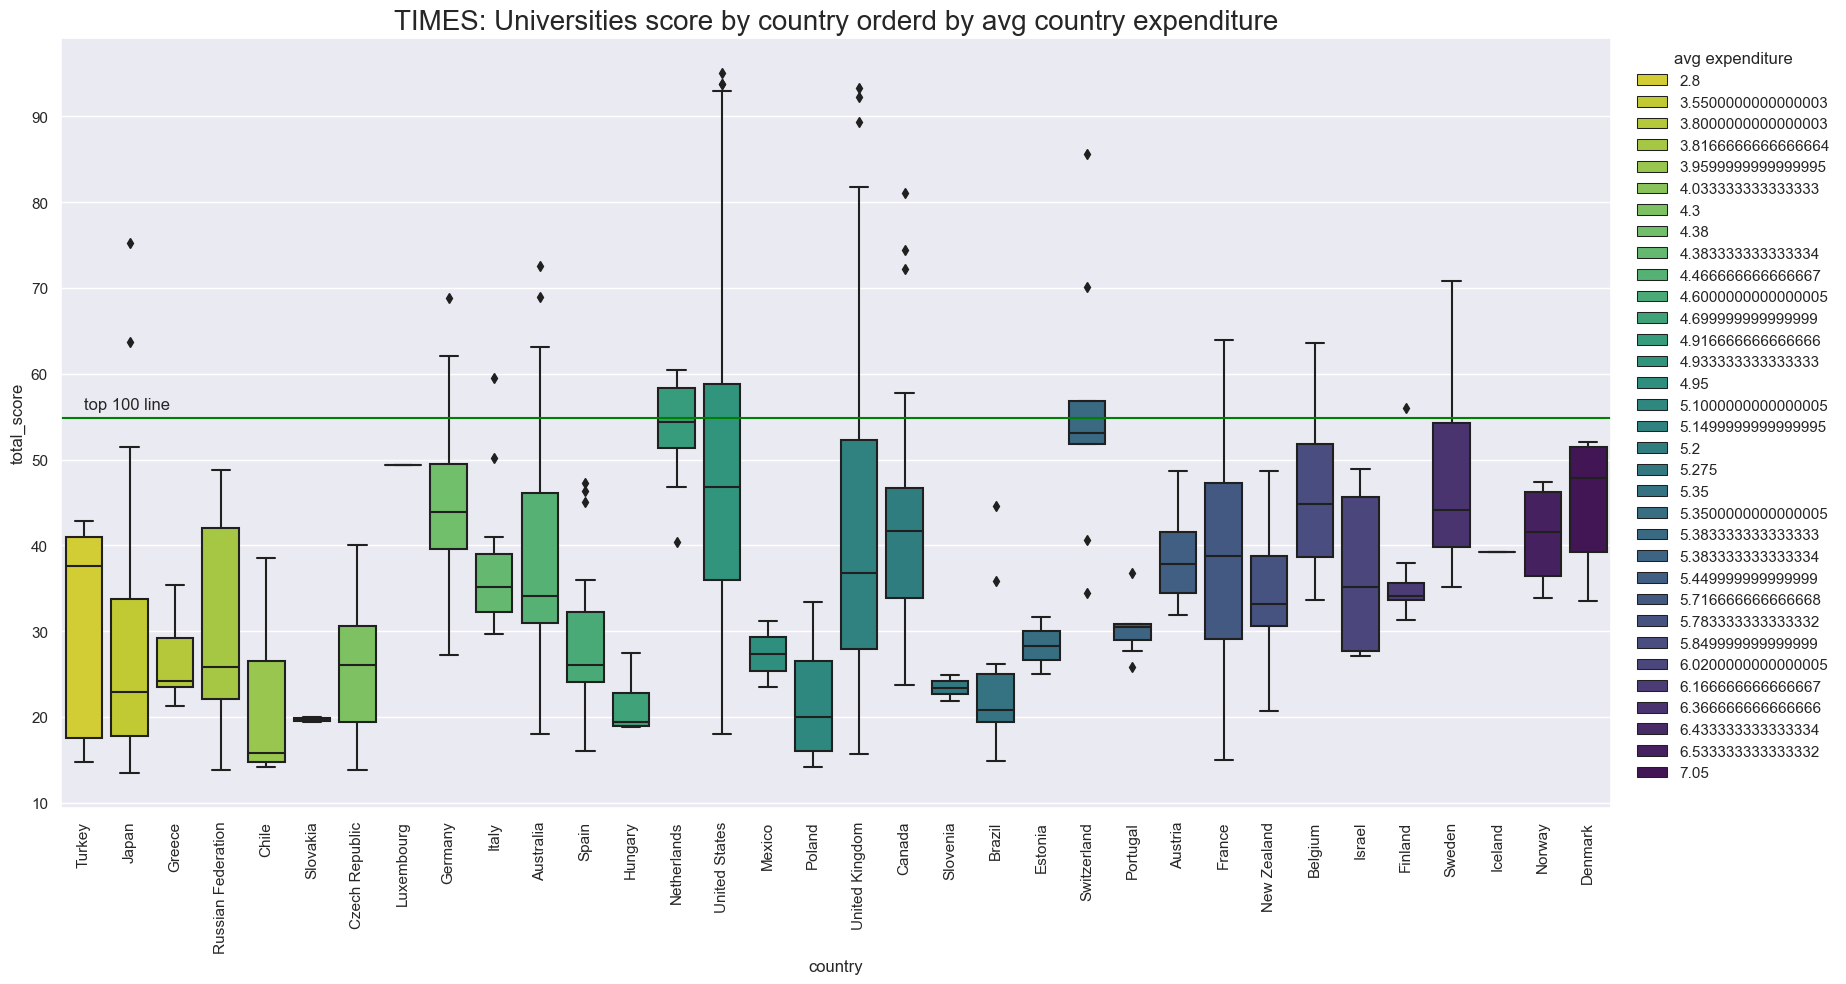

In [87]:
axes = sns.boxplot( y="total_score", x="country", data=times_uni_sample
, hue= 'avg_expenditure',
             palette='viridis_r',  dodge=False)
plt.tick_params(axis='x', rotation=90)
sns.set(rc={'figure.figsize':(20,10)})
plt.axhline(times_100_score, color = 'green')
plt.text(0,times_100_score+1,'top 100 line')

handles, labels = axes.get_legend_handles_labels()

axes.legend(handles, labels, ncol=1, loc='upper right', 
                bbox_to_anchor=(1.15, 1), title = 'avg expenditure', frameon=False)
plt.title("TIMES: Universities score by country orderd by avg country expenditure", fontsize=20)


Text(0.5, 1.0, 'TIMES: Universities score by country orderd by avg country expenditure')

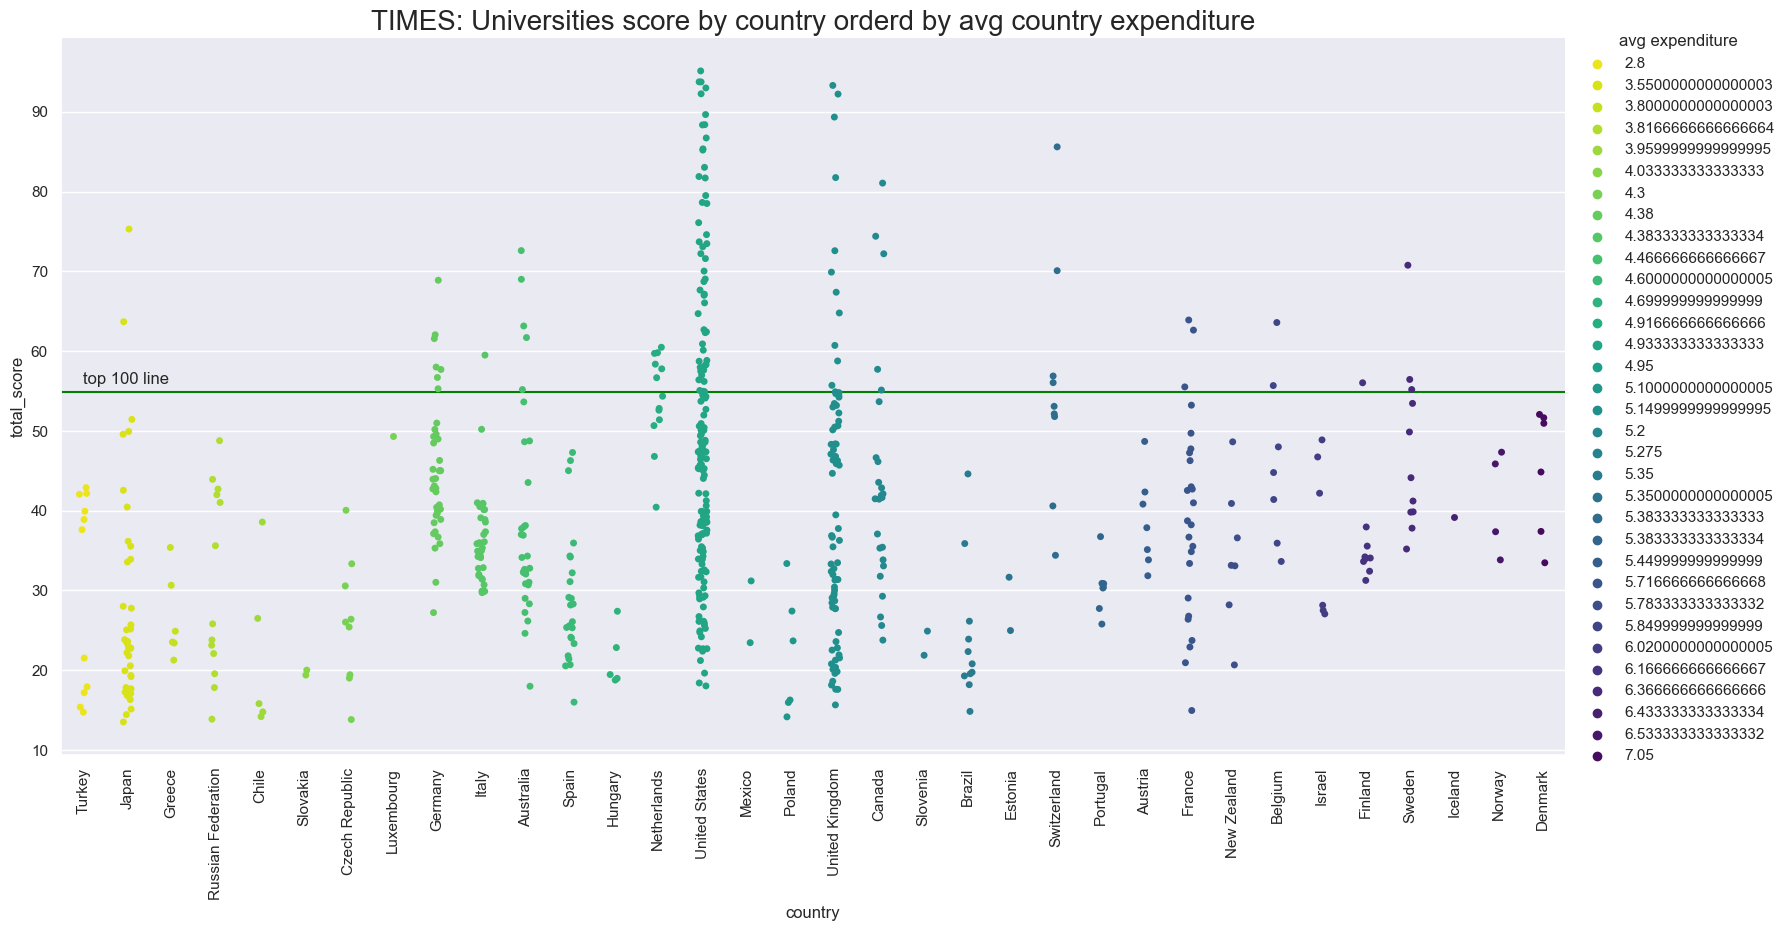

In [61]:

axes = sns.catplot( y="total_score", x="country", data=times_uni_sample
, hue= 'avg_expenditure', height=8,
            aspect=2, palette=sns.color_palette(palette = 'viridis_r', n_colors = 33))
plt.tick_params(axis='x', rotation=90)
plt.axhline(times_100_score, color = 'green')
plt.text(0,times_100_score+1,'top 100 line')

handles, labels = axes.axes[0][0].get_legend_handles_labels()
axes.legend.remove()

axes.fig.legend(handles, labels, ncol=1, loc='upper right', 
                bbox_to_anchor=(1, 1), title = 'avg expenditure', frameon=False)
plt.title("TIMES: Universities score by country orderd by avg country expenditure", fontsize=20)




### Shanghai

Text(0.5, 1.0, 'SHANGHAI: Universities score by country orderd by avg country expenditure')

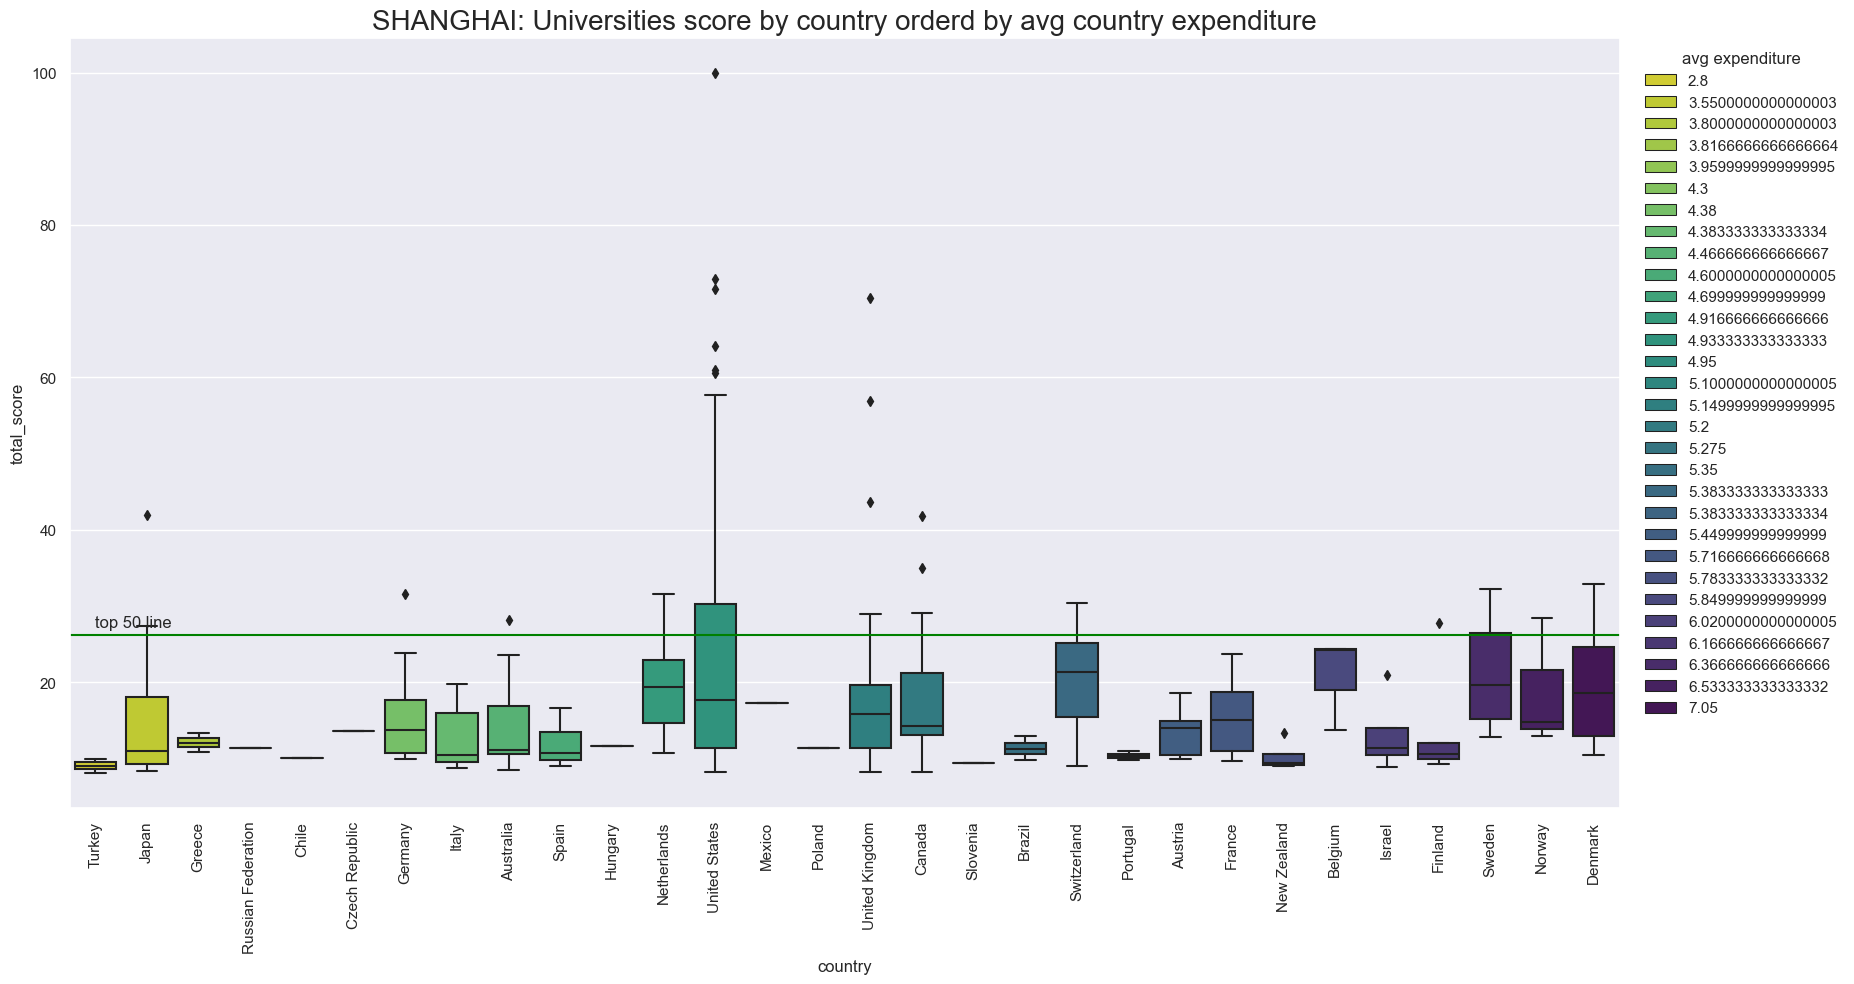

In [62]:
axes = sns.boxplot( y="total_score", x="country", data=shanghai_uni_sample
, hue= 'avg_expenditure',
             palette= 'viridis_r',  dodge=False)
plt.tick_params(axis='x', rotation=90)
sns.set(rc={'figure.figsize':(20,10)})
plt.axhline(shanghai_50_score, color = 'green')
plt.text(0,shanghai_50_score+1,'top 50 line')

handles, labels = axes.get_legend_handles_labels()

axes.legend(handles, labels, ncol=1, loc='upper right', 
                bbox_to_anchor=(1.15, 1), title = 'avg expenditure', frameon=False)
plt.title("SHANGHAI: Universities score by country orderd by avg country expenditure", fontsize=20)

Text(0.5, 1.0, 'SHANGHAI: Universities score by country orderd by avg country expenditure')

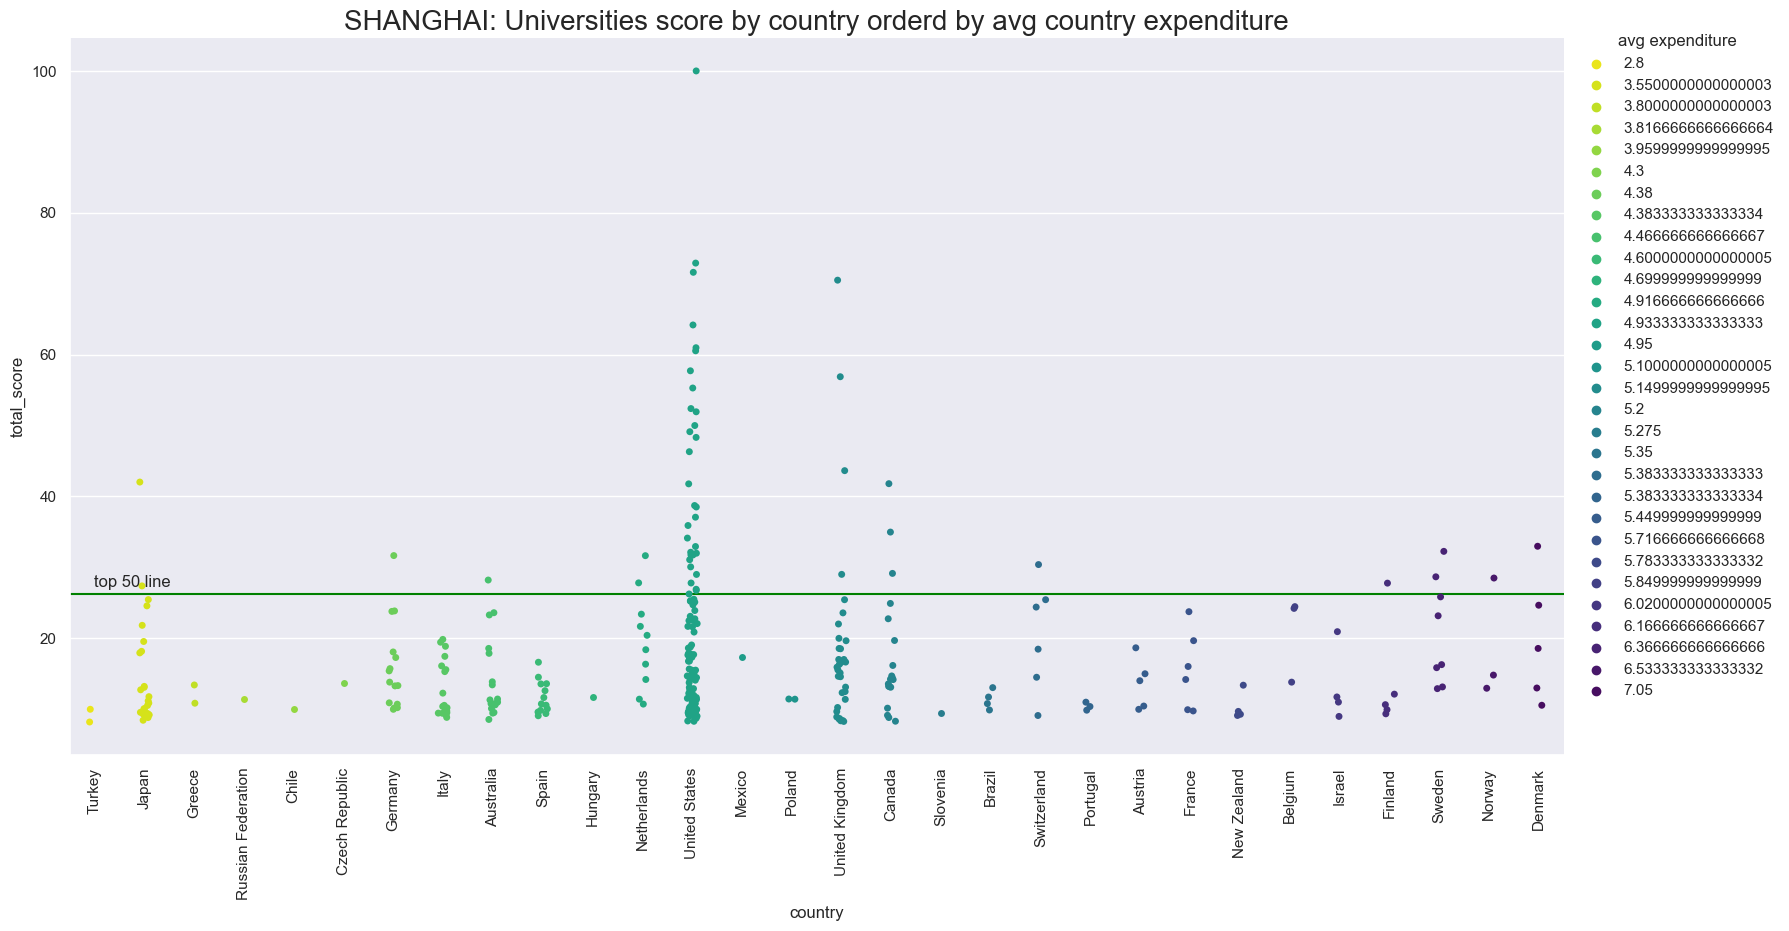

In [63]:

axes = sns.catplot( y="total_score", x="country", data=shanghai_uni_sample
, hue= 'avg_expenditure', height=8,
            aspect=2, palette=sns.color_palette(palette = 'viridis_r', n_colors = 30))

plt.tick_params(axis='x', rotation=90)
plt.axhline(shanghai_50_score, color = 'green')
plt.text(0,shanghai_50_score+1,'top 50 line')

handles, labels = axes.axes[0][0].get_legend_handles_labels()
axes.legend.remove()

axes.fig.legend(handles, labels, ncol=1, loc='upper right', 
                bbox_to_anchor=(1, 1), title = 'avg expenditure', frameon=False)
plt.title("SHANGHAI: Universities score by country orderd by avg country expenditure", fontsize=20)




### Arabia

Text(0.5, 1.0, 'ARABIA: Universities rank by country orderd by avg country expenditure')

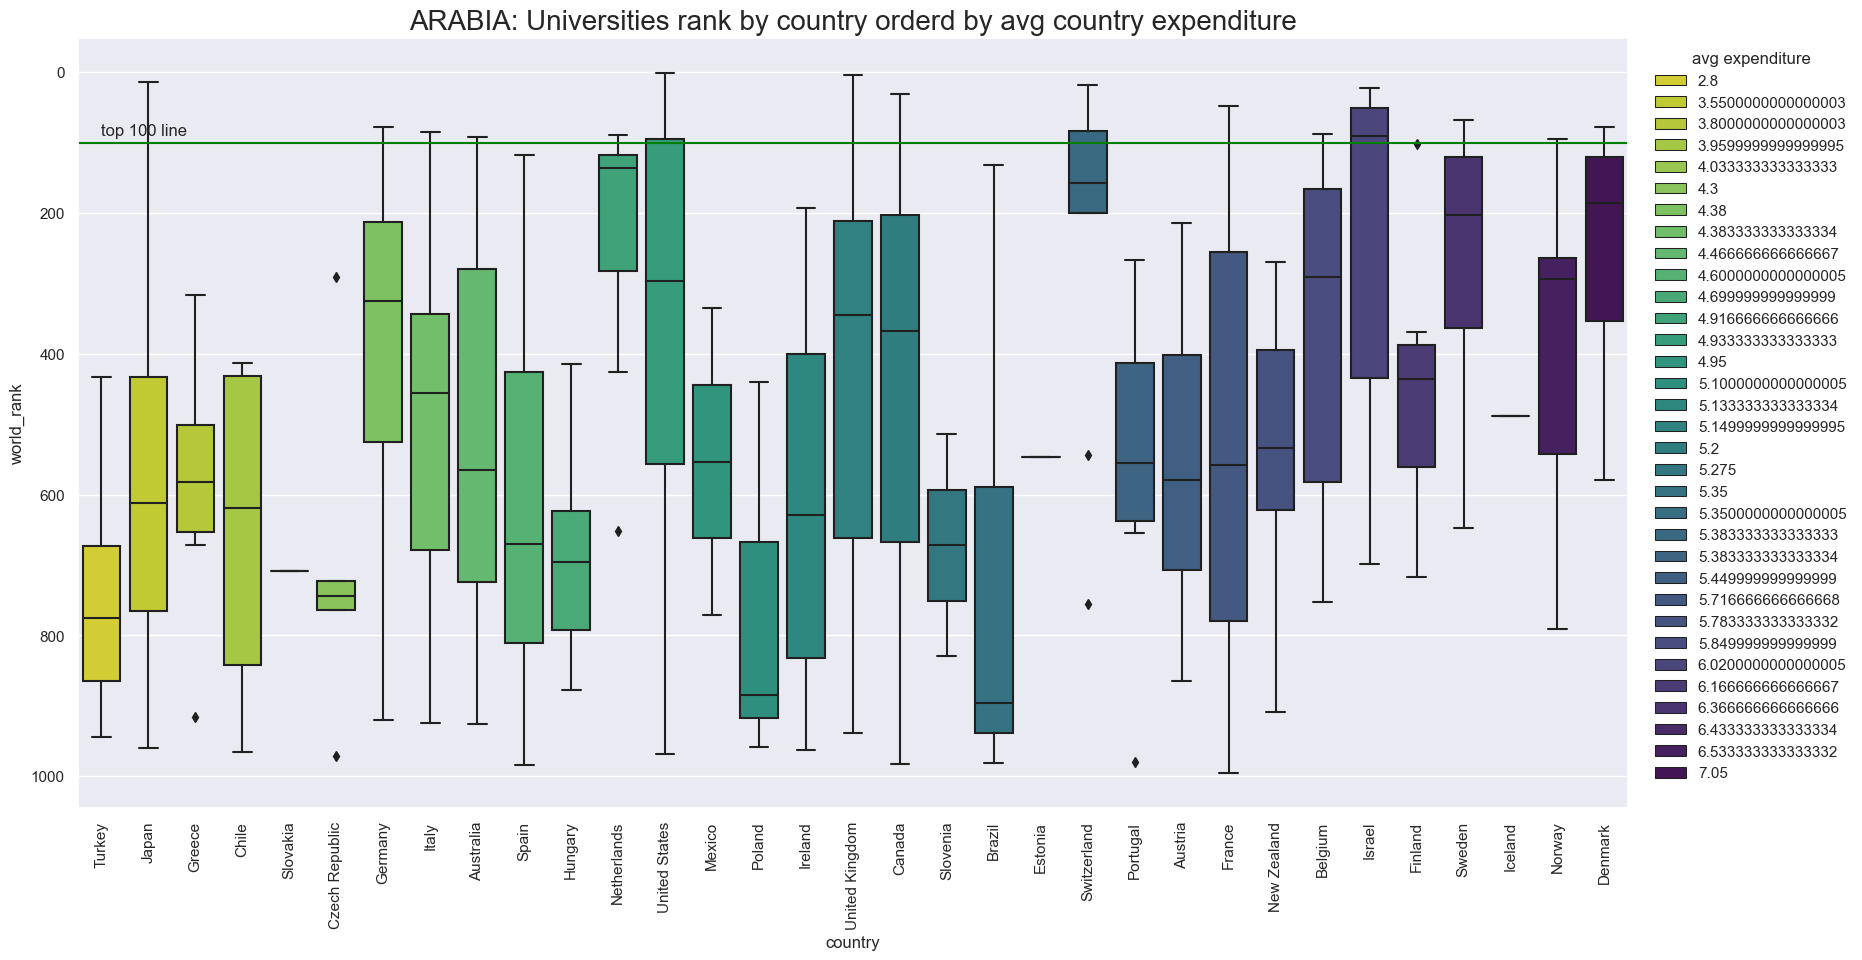

In [91]:
axes = sns.boxplot( y="world_rank", x="country", data=arabia_uni_sample
, hue= 'avg_expenditure',
             palette='viridis_r',  dodge=False)
plt.tick_params(axis='x', rotation=90)
sns.set(rc={'figure.figsize':(20,10)})
plt.axhline(100, color = 'green')
plt.text(0,100-10,'top 100 line')
axes.invert_yaxis()

handles, labels = axes.get_legend_handles_labels()

axes.legend(handles, labels, ncol=1, loc='upper right', 
                bbox_to_anchor=(1.15, 1), title = 'avg expenditure', frameon=False)
plt.title("ARABIA: Universities rank by country orderd by avg country expenditure", fontsize=20)

Text(0.5, 1.0, 'ARABIA: Universities rank by country orderd by avg country expenditure')

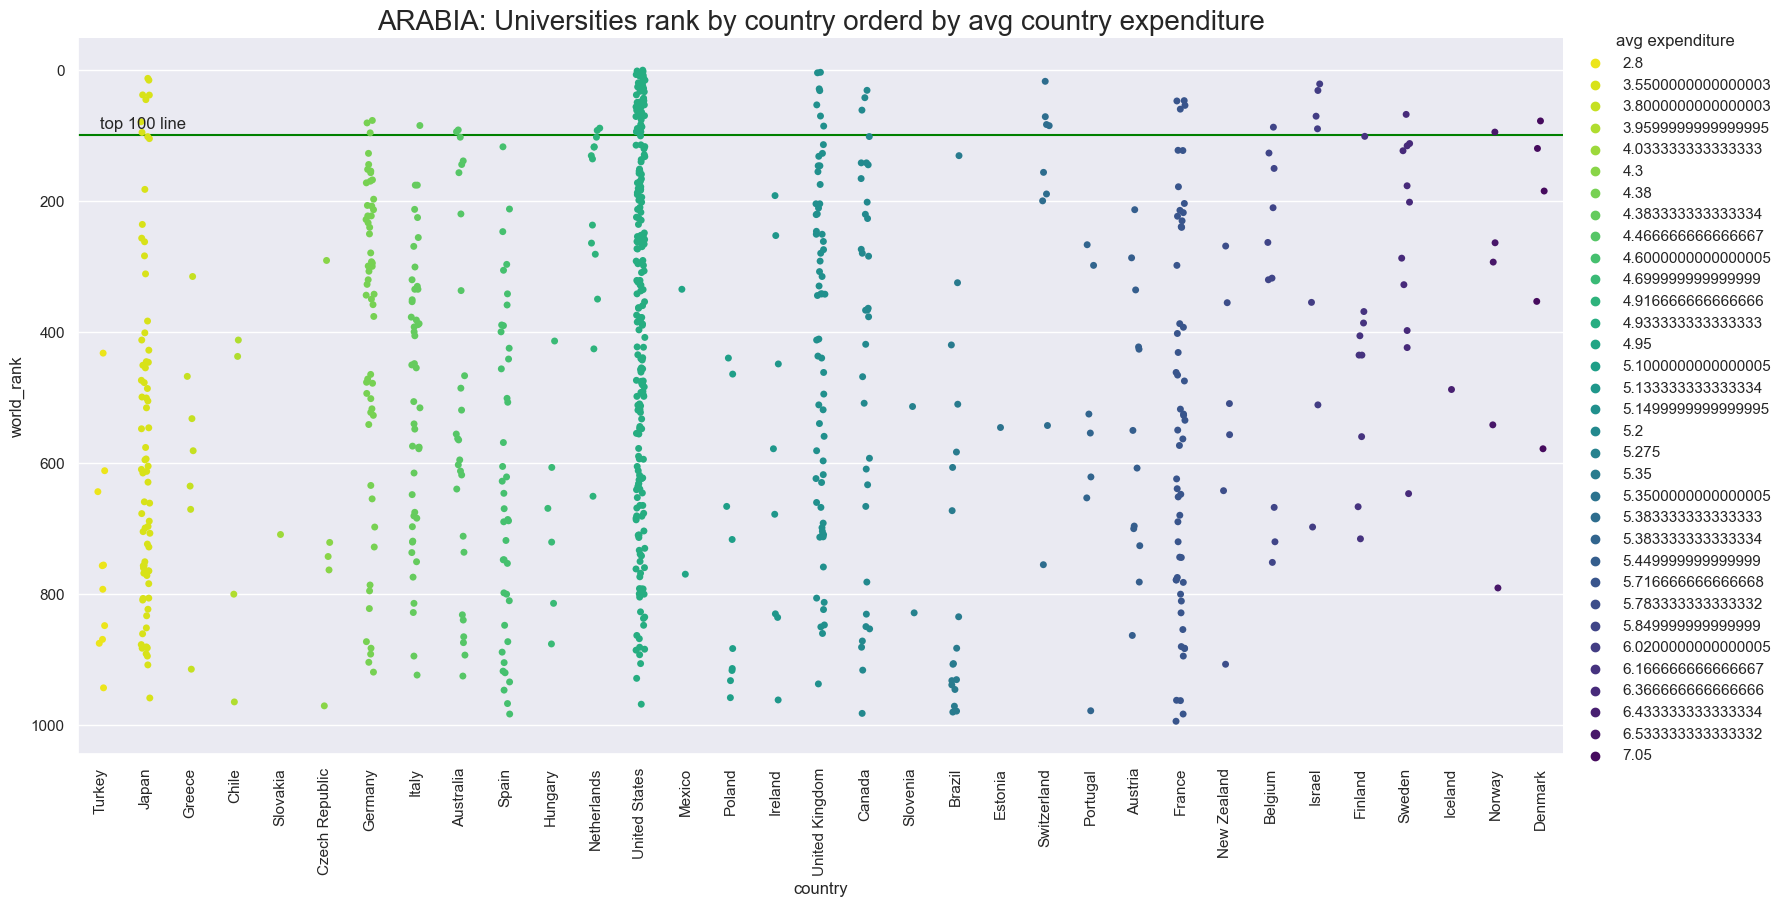

In [90]:

axes = sns.catplot( y="world_rank", x="country", data=arabia_uni_sample
, hue= 'avg_expenditure', height=8,
            aspect=2, palette=sns.color_palette(palette = 'viridis_r', n_colors = 33))

plt.tick_params(axis='x', rotation=90)
plt.axhline(100, color = 'green')
plt.text(0,100-10,'top 100 line')
plt.gca().invert_yaxis()

handles, labels = axes.axes[0][0].get_legend_handles_labels()
axes.legend.remove()

axes.fig.legend(handles, labels, ncol=1, loc='upper right', 
                bbox_to_anchor=(1, 1), title = 'avg expenditure', frameon=False)
plt.title("ARABIA: Universities rank by country orderd by avg country expenditure", fontsize=20)




In [66]:
# countries that are in the top 100
times_top100_countries = set(times_uni_sample.sort_values(by = ['total_score'],ascending=False).iloc[:100].country)
shanghai_top50_countries = set(shanghai_uni_sample.sort_values(by = ['total_score'],ascending=False).iloc[:50].country)
arabia_top100_countries = set(arabia_uni_sample.sort_values(by = ['world_rank'],ascending=False).iloc[:100].country)

In [67]:
print(times_top100_countries)
print()
print(shanghai_top50_countries)
print()
print(arabia_top100_countries)

{'Australia', 'Italy', 'Netherlands', 'Germany', 'Canada', 'Switzerland', 'Belgium', 'United Kingdom', 'France', 'Sweden', 'Japan', 'Finland', 'United States'}

{'Australia', 'Netherlands', 'Germany', 'Canada', 'Switzerland', 'Norway', 'United Kingdom', 'Finland', 'Sweden', 'Japan', 'United States', 'Denmark'}

{'Czech Republic', 'Brazil', 'Germany', 'United Kingdom', 'New Zealand', 'Slovenia', 'Italy', 'Hungary', 'Canada', 'Chile', 'Japan', 'United States', 'Poland', 'Australia', 'Austria', 'Spain', 'Turkey', 'France', 'Ireland', 'Greece', 'Portugal'}


In [68]:
times_top100_countries_per = pd.DataFrame(times_uni_sample.sort_values(by = ['total_score'],ascending=False).iloc[:100].country.value_counts(normalize = True)).reset_index()
shanghai_top50_countries_per = pd.DataFrame(shanghai_uni_sample.sort_values(by = ['total_score'],ascending=False).iloc[:100].country.value_counts(normalize = True)).reset_index()
arabia_top100_countries_per = pd.DataFrame(arabia_uni_sample.sort_values(by = ['world_rank'],ascending=False).iloc[:100].country.value_counts(normalize = True)).reset_index()

In [69]:
times_top100_countries_per.rename(columns = {'index': 'countries', 'country':'percentage'}, inplace =True)
shanghai_top50_countries_per.rename(columns = {'index': 'countries', 'country':'percentage'}, inplace =True)
arabia_top100_countries_per.rename(columns = {'index': 'countries', 'country':'percentage'}, inplace =True)

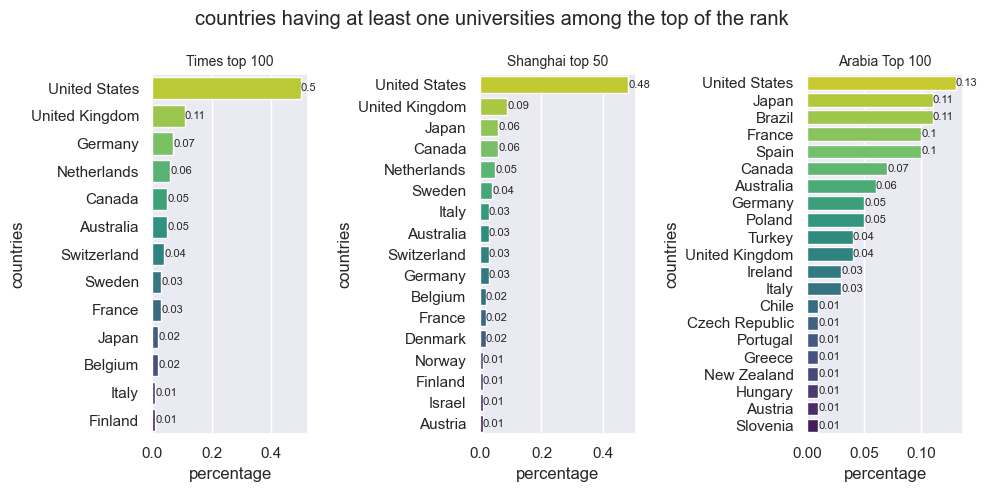

In [70]:
fig, ax = plt.subplots(1,3,  figsize=(10,5 ))

sns.barplot(data = times_top100_countries_per, y = 'countries', x = 'percentage', palette = 'viridis_r', ax = ax[0])
ax[0].bar_label(ax[0].containers[0], fontsize = 8, padding = 0.1)
ax[0].set_title('Times top 100', fontsize = 10)

sns.barplot(data = shanghai_top50_countries_per, y = 'countries', x = 'percentage', palette = 'viridis_r', ax = ax[1])
ax[1].bar_label(ax[1].containers[0], fontsize = 8, padding = 0.1)
ax[1].set_title('Shanghai top 50', fontsize = 10)

sns.barplot(data = arabia_top100_countries_per, y = 'countries', x = 'percentage', palette = 'viridis_r', ax = ax[2])
ax[2].bar_label(ax[2].containers[0], fontsize = 8, padding = 0.1)
ax[2].set_title('Arabia Top 100', fontsize = 10)

fig.suptitle('countries having at least one universities among the top of the rank')
fig.tight_layout()

### Results

Based on the distribution of the universities scores and ranks we cannot say that high expediture lead to better performing universities, the datapoints are sparse and no linear correlation can be inferred or seen. 

Italy for example even though has relative low expenditure still manages to have a bunch of universities in the top levels of the rankings (times: 1%, shanghai: 3%, arabia: 3%) despite having scores distributions similar to France, Portugal and Austria which spend more

United States universities are higly favored by times and shanghai, rankings in which half of the top universities belong to the US. The Arabia rank seems the only one who favors more other countries despite still having US universties as the majority in the top levels occupying 13% of the rank

 ## Countries that have top level universities have higher educational levels ?

### Years of schooling

In [71]:
corr = np.corrcoef(mean_years_schooling_25_and_avg_expenditure.avg_expenditure, mean_years_schooling_25_and_avg_expenditure.avg_years_tot_schooling)

Text(0.5, 1.0, 'avg country expenditure vs avg years of schooling, corr = 0.33393788560557813')

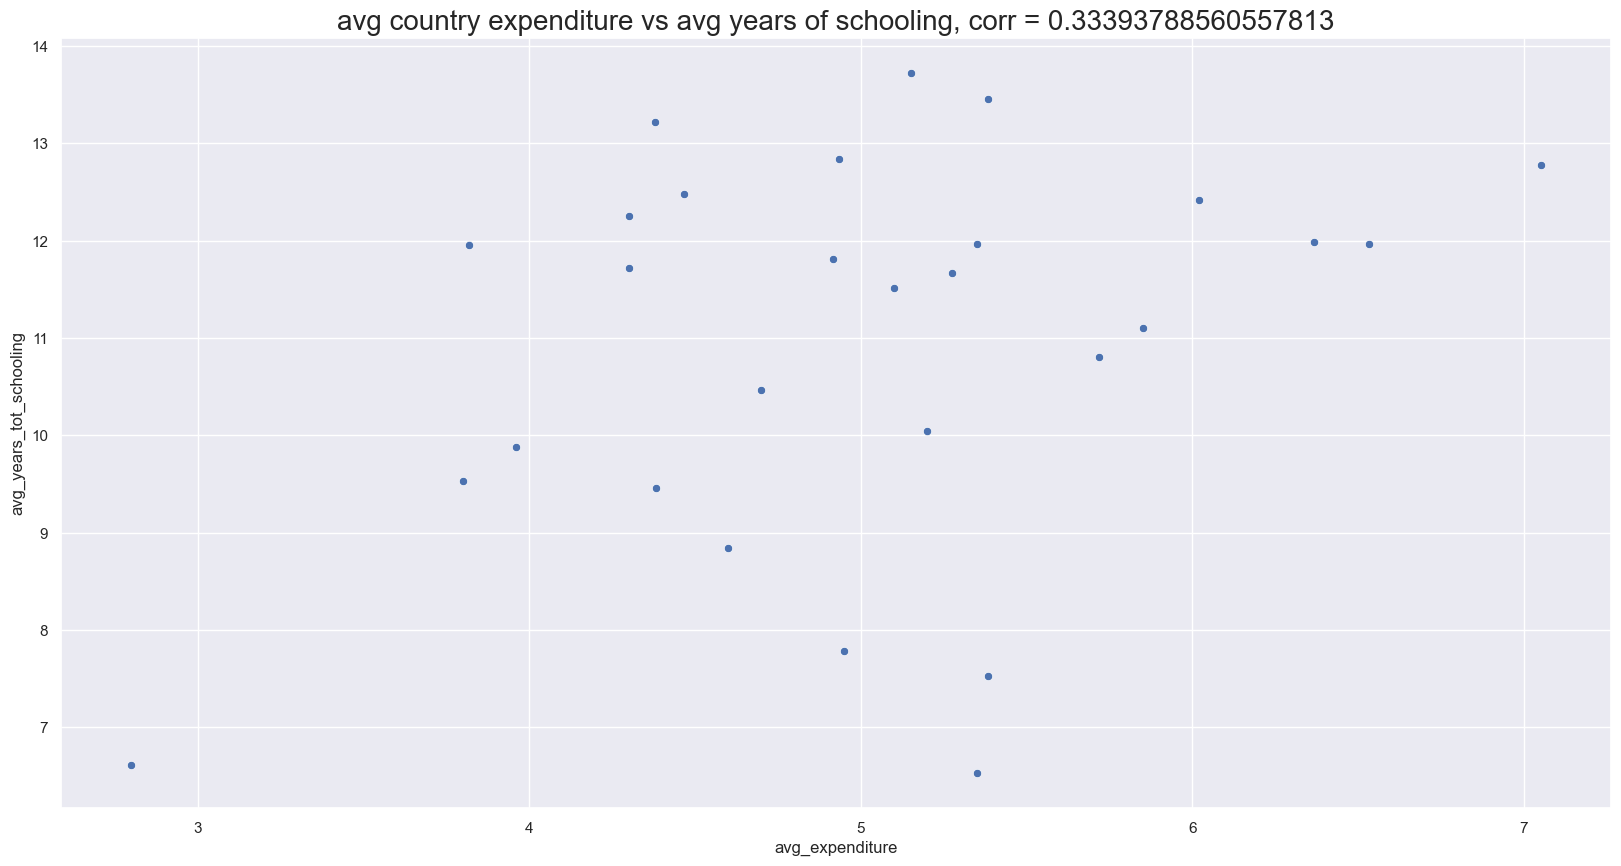

In [72]:
sns.scatterplot(data = mean_years_schooling_25_and_avg_expenditure, x = 'avg_expenditure', y = 'avg_years_tot_schooling')
plt.title("avg country expenditure vs avg years of schooling, corr = {}".format(corr[0,1]) , fontsize=20)


In [73]:
arabia_top100_schooling_years = mean_years_schooling_25[mean_years_schooling_25.country_name.isin(arabia_top100_countries)]
shanghai_top50_schooling_years = mean_years_schooling_25[mean_years_schooling_25.country_name.isin(shanghai_top50_countries)]
times_top100_schooling_years = mean_years_schooling_25[mean_years_schooling_25.country_name.isin(times_top100_countries)]

In [74]:
italy_years = mean_years_schooling_25[mean_years_schooling_25.country_name == 'Italy'].avg_years_tot_schooling.values[0]

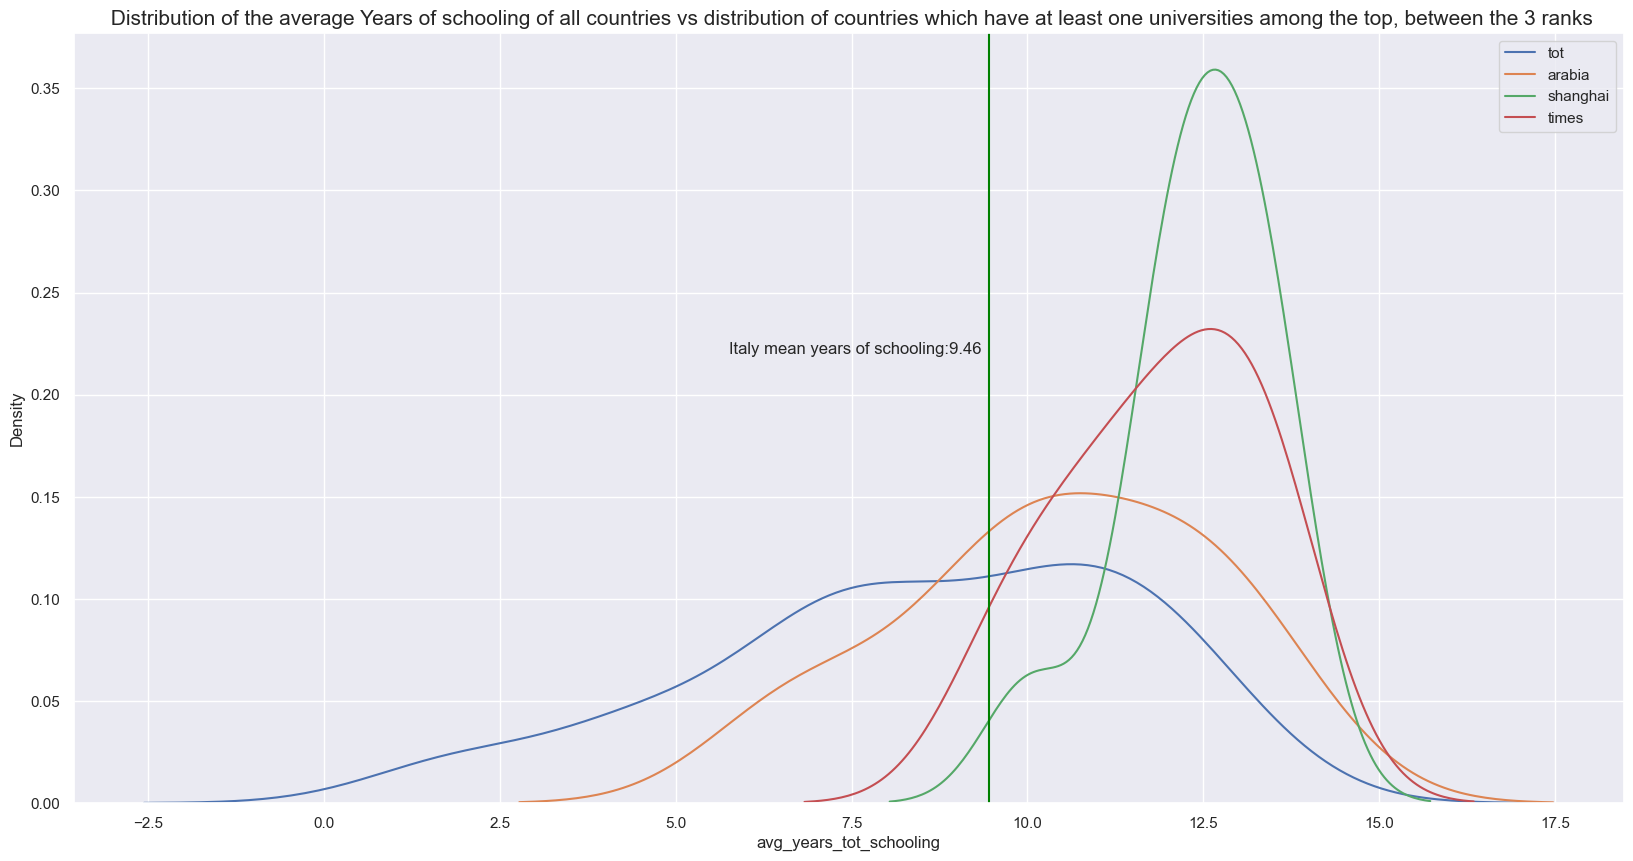

In [75]:
sns.kdeplot(data = mean_years_schooling_25, x = 'avg_years_tot_schooling', label = 'tot')
sns.kdeplot(data = arabia_top100_schooling_years, x = 'avg_years_tot_schooling', label = 'arabia' )
sns.kdeplot(data = shanghai_top50_schooling_years, x = 'avg_years_tot_schooling', label = 'shanghai')
sns.kdeplot(data = times_top100_schooling_years, x = 'avg_years_tot_schooling', label = 'times')
plt.axvline(italy_years, color = 'green')
plt.text(italy_years -3.7,0.22,'Italy mean years of schooling:{}'.format(round(italy_years,2)))
plt.title(' Distribution of the average Years of schooling of all countries vs distribution of countries which have at least one universities among the top, between the 3 ranks', fontsize = 15)
plt.legend()

### % of pop with tertiary schooling

In [76]:
corr = np.corrcoef(tertiary_schooling_25_and_avg_expenditure.avg_expenditure, tertiary_schooling_25_and_avg_expenditure.avg_per_tertiary_schooling_25)

Text(0.5, 1.0, 'avg country expenditure vs avg percenage tertiary schooling 25+, corr = 0.11628101892106424')

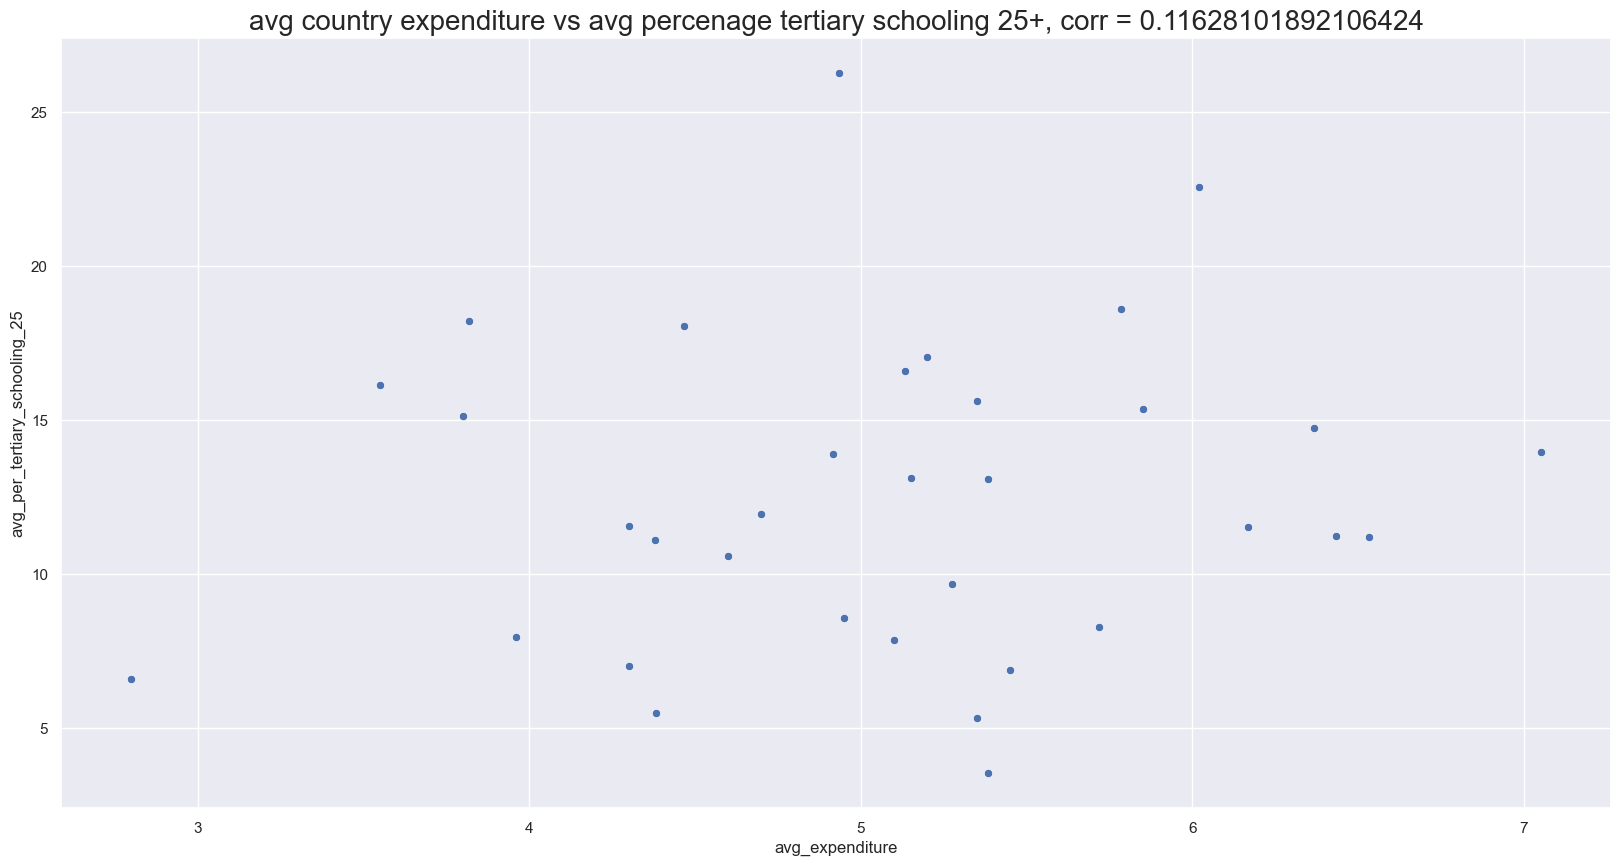

In [77]:
sns.scatterplot(data = tertiary_schooling_25_and_avg_expenditure , x = 'avg_expenditure', y = 'avg_per_tertiary_schooling_25')
plt.title("avg country expenditure vs avg percenage tertiary schooling 25+, corr = {}".format(corr[0,1]) , fontsize=20)


In [78]:
arabia_top100_tertiary_schooling = tertiary_schooling_25[tertiary_schooling_25.country_name.isin(arabia_top100_countries)]
shanghai_top50_tertiary_schooling = tertiary_schooling_25[tertiary_schooling_25.country_name.isin(shanghai_top50_countries)]
times_top100_tertiary_schooling = tertiary_schooling_25[tertiary_schooling_25.country_name.isin(times_top100_countries)]


In [79]:
italy_percentage = tertiary_schooling_25[tertiary_schooling_25.country_name == 'Italy'].avg_per_tertiary_schooling_25.values[0]

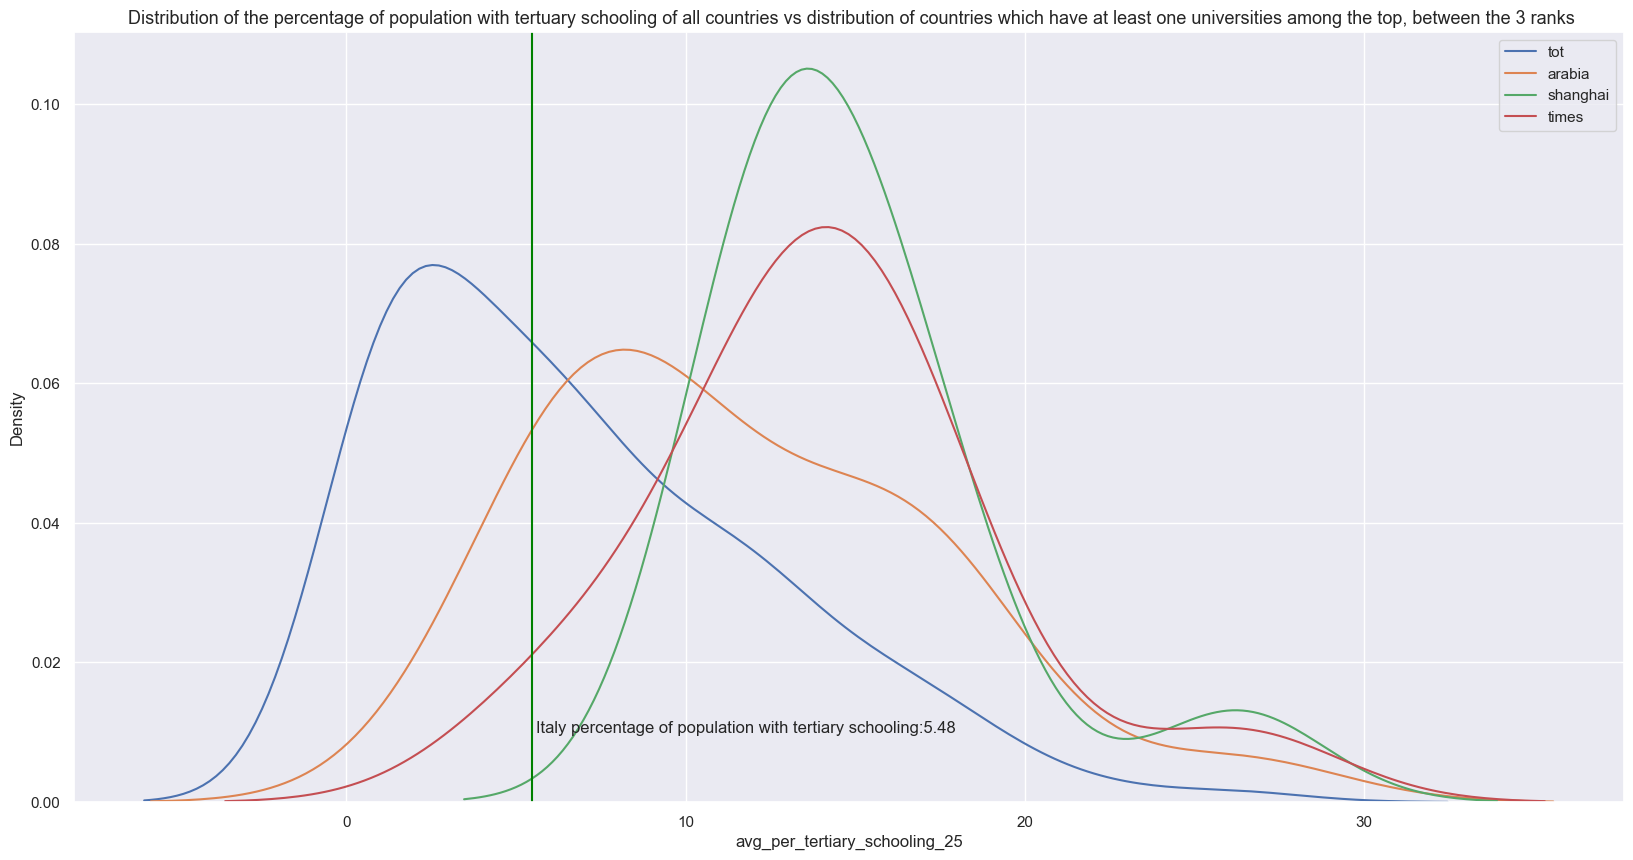

In [80]:
sns.kdeplot(data = tertiary_schooling_25, x = 'avg_per_tertiary_schooling_25', label = 'tot' )
sns.kdeplot(data = arabia_top100_tertiary_schooling, x = 'avg_per_tertiary_schooling_25', label = 'arabia' )
sns.kdeplot(data = shanghai_top50_tertiary_schooling, x = 'avg_per_tertiary_schooling_25', label = 'shanghai' )
sns.kdeplot(data = times_top100_tertiary_schooling, x = 'avg_per_tertiary_schooling_25', label = 'times' )
plt.axvline(italy_percentage, color = 'green')
plt.text(italy_percentage+0.1,0.01,'Italy percentage of population with tertiary schooling:{}'.format(round(italy_percentage,2)))
plt.title(' Distribution of the percentage of population with tertuary schooling of all countries vs distribution of countries which have at least one universities among the top, between the 3 ranks', fontsize = 13)

plt.legend()

### Results

There is a slight positive correlation beteween expenditure and years of schooling and a very lower one between expenditure and % of tertiary schooling, but not enough to infer something

On the other hand countries entering the top levels of the ranks have higher educational levels both in terms of tot years of schooling and percentage of population with terrtiaryy schooling. 
Though, Italy has some very few universities among the top, performs poorly in terms of educational levels having both years of schooling and tertiary schooling positioned on the lower quartiles of all the ranks distributions

## Countries that spend more on education have better performing research scores? 

### Times

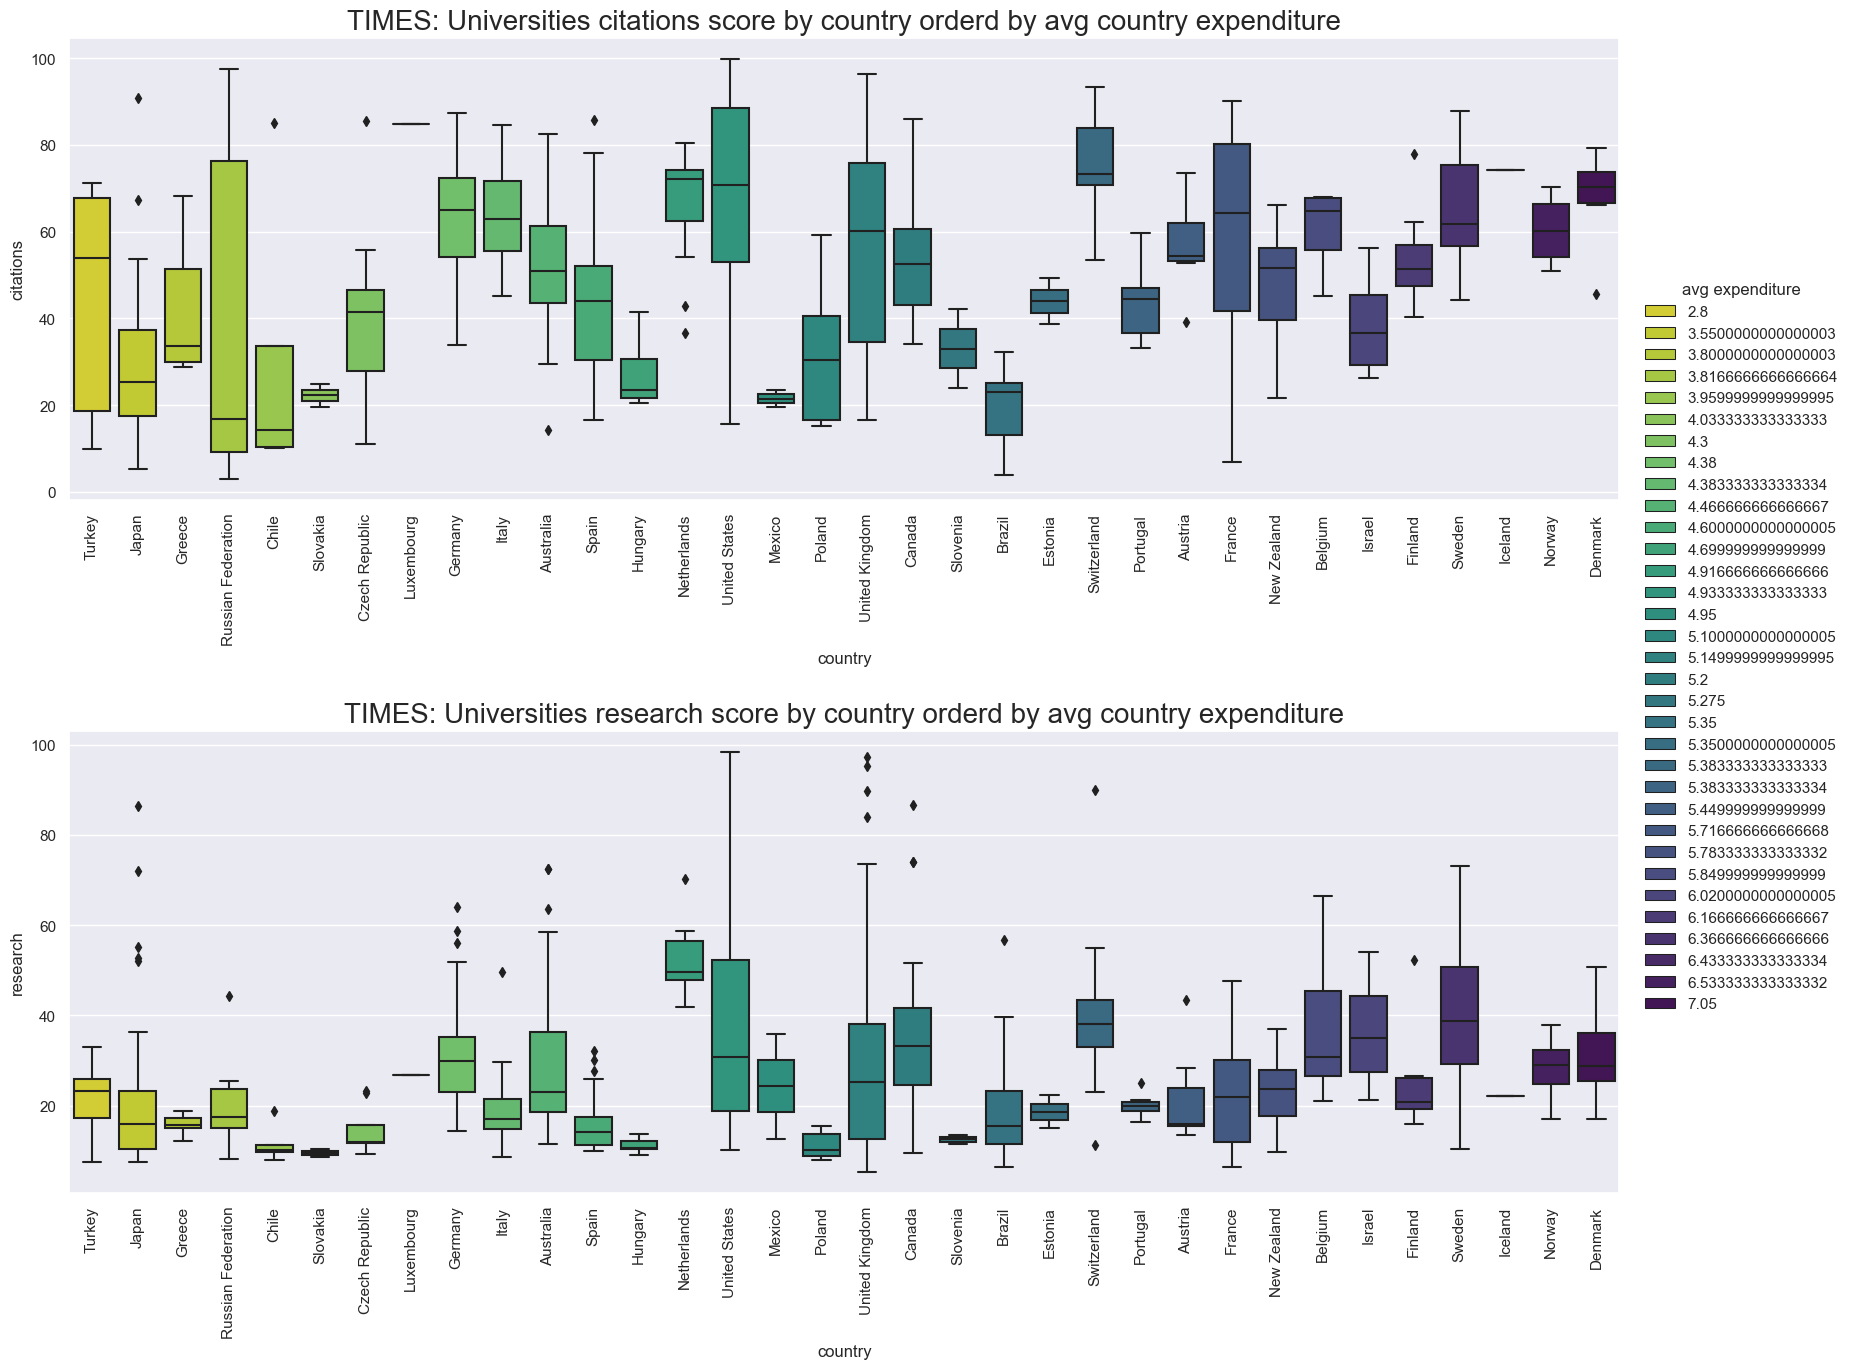

In [81]:
fig, ax = plt.subplots(2,1,  figsize=(20, 15))
ax[0] = sns.boxplot( y="citations", x="country", data=times_uni_sample
, hue= 'avg_expenditure',
             palette='viridis_r',  dodge=False, ax = ax[0])
ax[0].tick_params(axis='x', rotation=90)



handles, labels = ax[0].get_legend_handles_labels()

ax[0].legend(handles, labels, ncol=1, loc='upper right', 
                bbox_to_anchor=(1.15, 0.5), title = 'avg expenditure', frameon=False)
ax[0].set_title("TIMES: Universities citations score by country orderd by avg country expenditure", fontsize = 20)

ax[1]= sns.boxplot( y="research", x="country", data=times_uni_sample
, hue= 'avg_expenditure',
             palette= 'viridis_r',  dodge=False, ax = ax[1])
ax[1].tick_params(axis='x', rotation=90)



handles, labels = ax[1].get_legend_handles_labels()

ax[1].legend().remove()
ax[1].set_title("TIMES: Universities research score by country orderd by avg country expenditure", fontsize = 20)

fig.subplots_adjust(hspace =0.5)

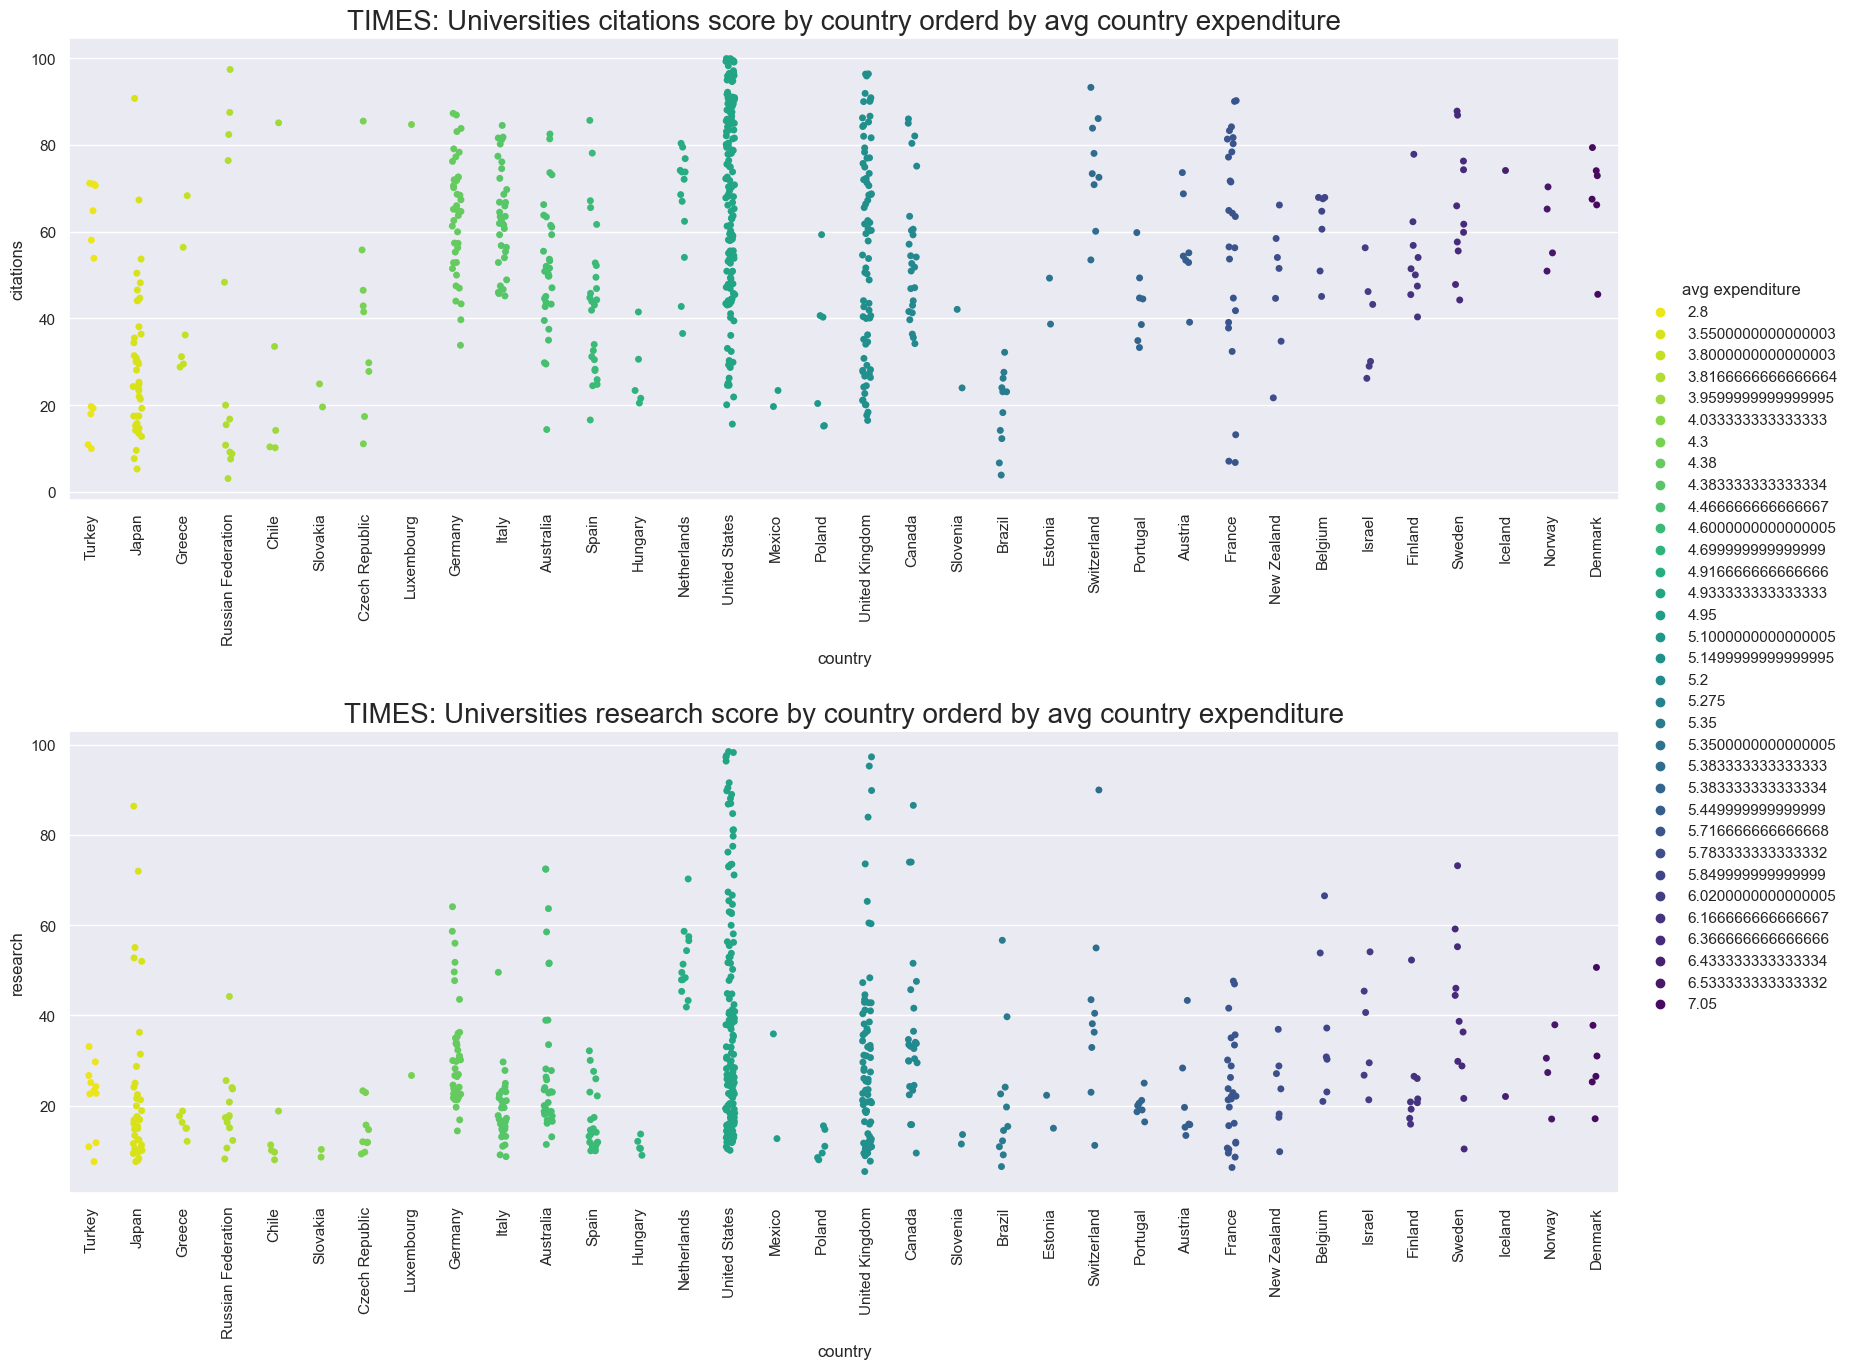

In [82]:
fig, ax = plt.subplots(2,1,  figsize=(20, 15))

ax[0] = sns.stripplot( y="citations", x="country", data=times_uni_sample
, hue= 'avg_expenditure', palette=sns.color_palette(palette = 'viridis_r', n_colors = 33), ax = ax[0] )

ax[0].tick_params(axis='x', rotation=90)


handles, labels = ax[0].get_legend_handles_labels()

ax[0].legend(handles, labels, ncol=1, loc='upper right', 
                bbox_to_anchor=(1.15, 0.5), title = 'avg expenditure', frameon=False)
ax[0].set_title("TIMES: Universities citations score by country orderd by avg country expenditure", fontsize=20)

ax[1] = sns.stripplot( y="research", x="country", data=times_uni_sample
, hue= 'avg_expenditure', palette=sns.color_palette(palette = 'viridis_r', n_colors = 33), ax = ax[1] )

ax[1].tick_params(axis='x', rotation=90)


handles, labels = ax[1].get_legend_handles_labels()
ax[1].legend().remove()


ax[1].set_title("TIMES: Universities research score by country orderd by avg country expenditure", fontsize=20)

fig.subplots_adjust(hspace =0.5)

### Shanghai

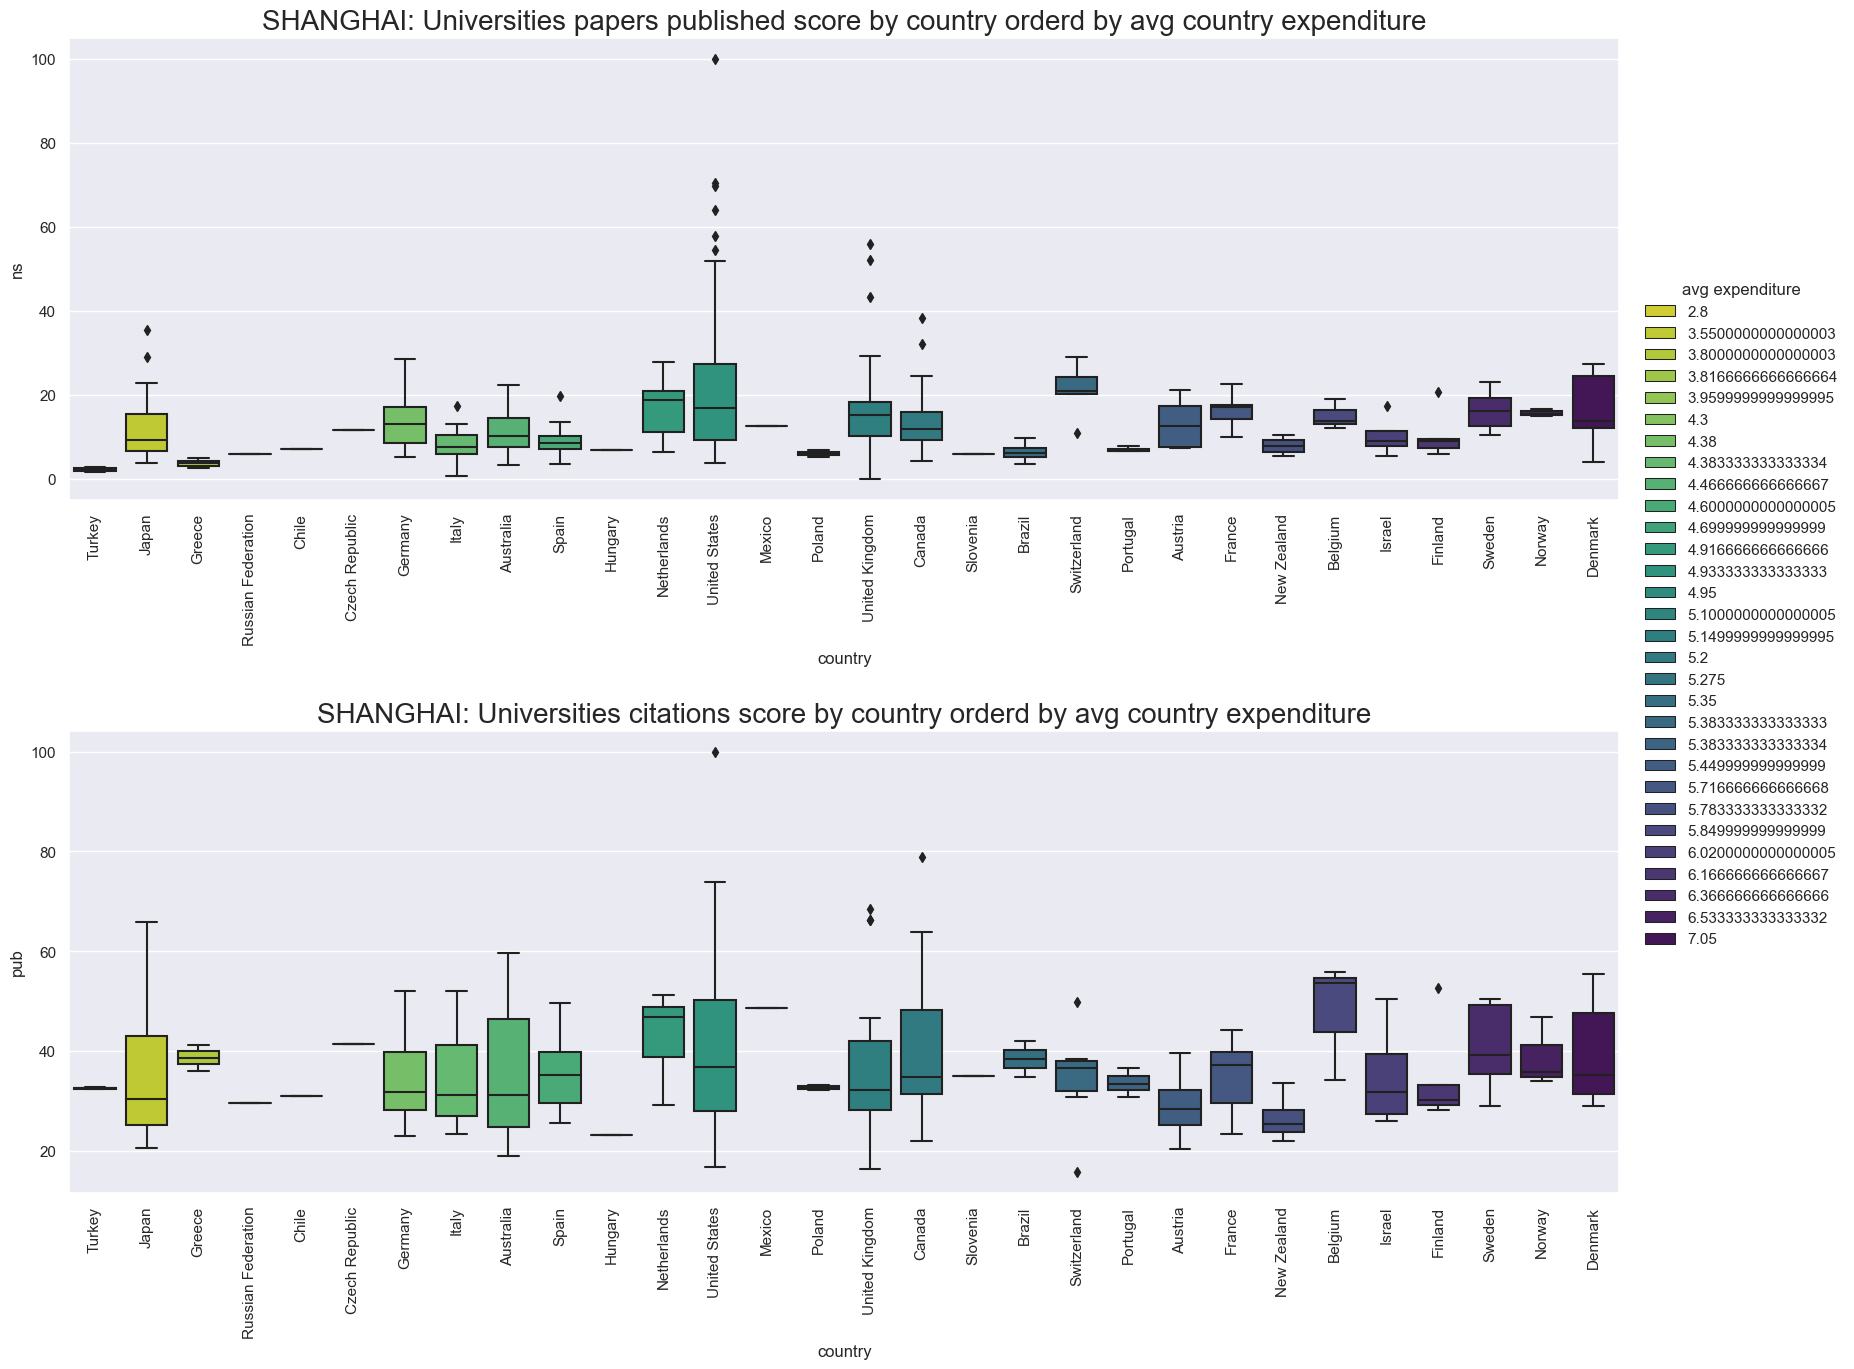

In [83]:
fig, ax = plt.subplots(2,1,  figsize=(20, 15))
ax[0] = sns.boxplot( y="ns", x="country", data=shanghai_uni_sample
, hue= 'avg_expenditure',
             palette='viridis_r',  dodge=False, ax = ax[0])
ax[0].tick_params(axis='x', rotation=90)



handles, labels = ax[0].get_legend_handles_labels()

ax[0].legend(handles, labels, ncol=1, loc='upper right', 
                bbox_to_anchor=(1.15, 0.5), title = 'avg expenditure', frameon=False)
ax[0].set_title("SHANGHAI: Universities papers published score by country orderd by avg country expenditure", fontsize = 20)

ax[1]= sns.boxplot( y="pub", x="country", data=shanghai_uni_sample
, hue= 'avg_expenditure',
             palette='viridis_r',  dodge=False, ax = ax[1])
ax[1].tick_params(axis='x', rotation=90)



handles, labels = ax[1].get_legend_handles_labels()

ax[1].legend().remove()
ax[1].set_title("SHANGHAI: Universities citations score by country orderd by avg country expenditure", fontsize = 20)

fig.subplots_adjust(hspace =0.5)

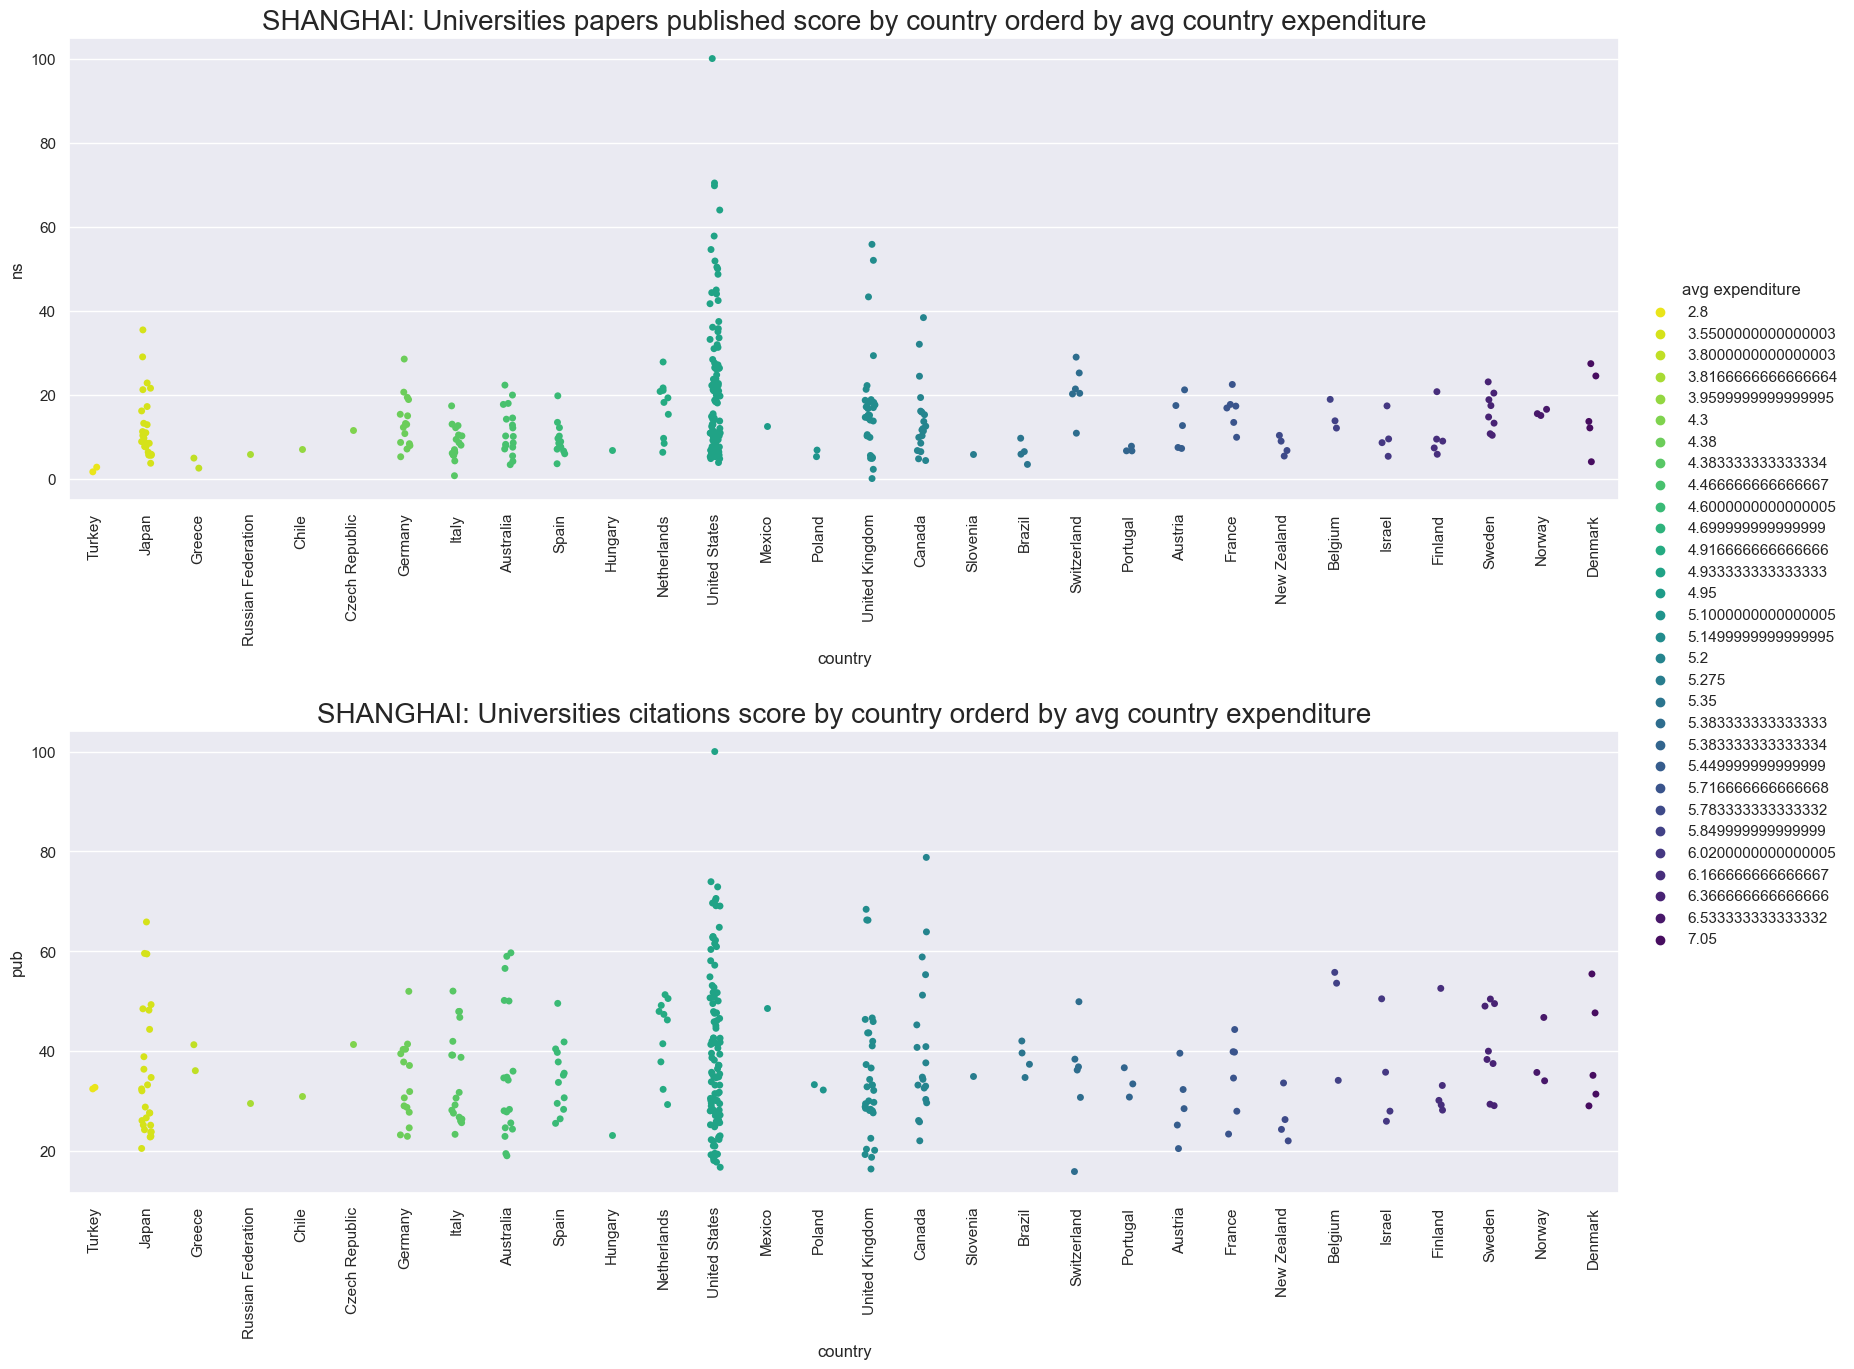

In [84]:
fig, ax = plt.subplots(2,1,  figsize=(20, 15))

ax[0] = sns.stripplot( y="ns", x="country", data=shanghai_uni_sample
, hue= 'avg_expenditure', palette=sns.color_palette(palette = 'viridis_r', n_colors = 30), ax = ax[0] )

ax[0].tick_params(axis='x', rotation=90)


handles, labels = ax[0].get_legend_handles_labels()

ax[0].legend(handles, labels, ncol=1, loc='upper right', 
                bbox_to_anchor=(1.15, 0.5), title = 'avg expenditure', frameon=False)
ax[0].set_title("SHANGHAI: Universities papers published score by country orderd by avg country expenditure", fontsize=20)

ax[1] = sns.stripplot( y="pub", x="country", data=shanghai_uni_sample
, hue= 'avg_expenditure', palette=sns.color_palette(palette = 'viridis_r', n_colors = 30), ax = ax[1] )

ax[1].tick_params(axis='x', rotation=90)


handles, labels = ax[1].get_legend_handles_labels()
ax[1].legend().remove()


ax[1].set_title("SHANGHAI: Universities citations score by country orderd by avg country expenditure", fontsize=20)

fig.subplots_adjust(hspace =0.5)

### Arabia

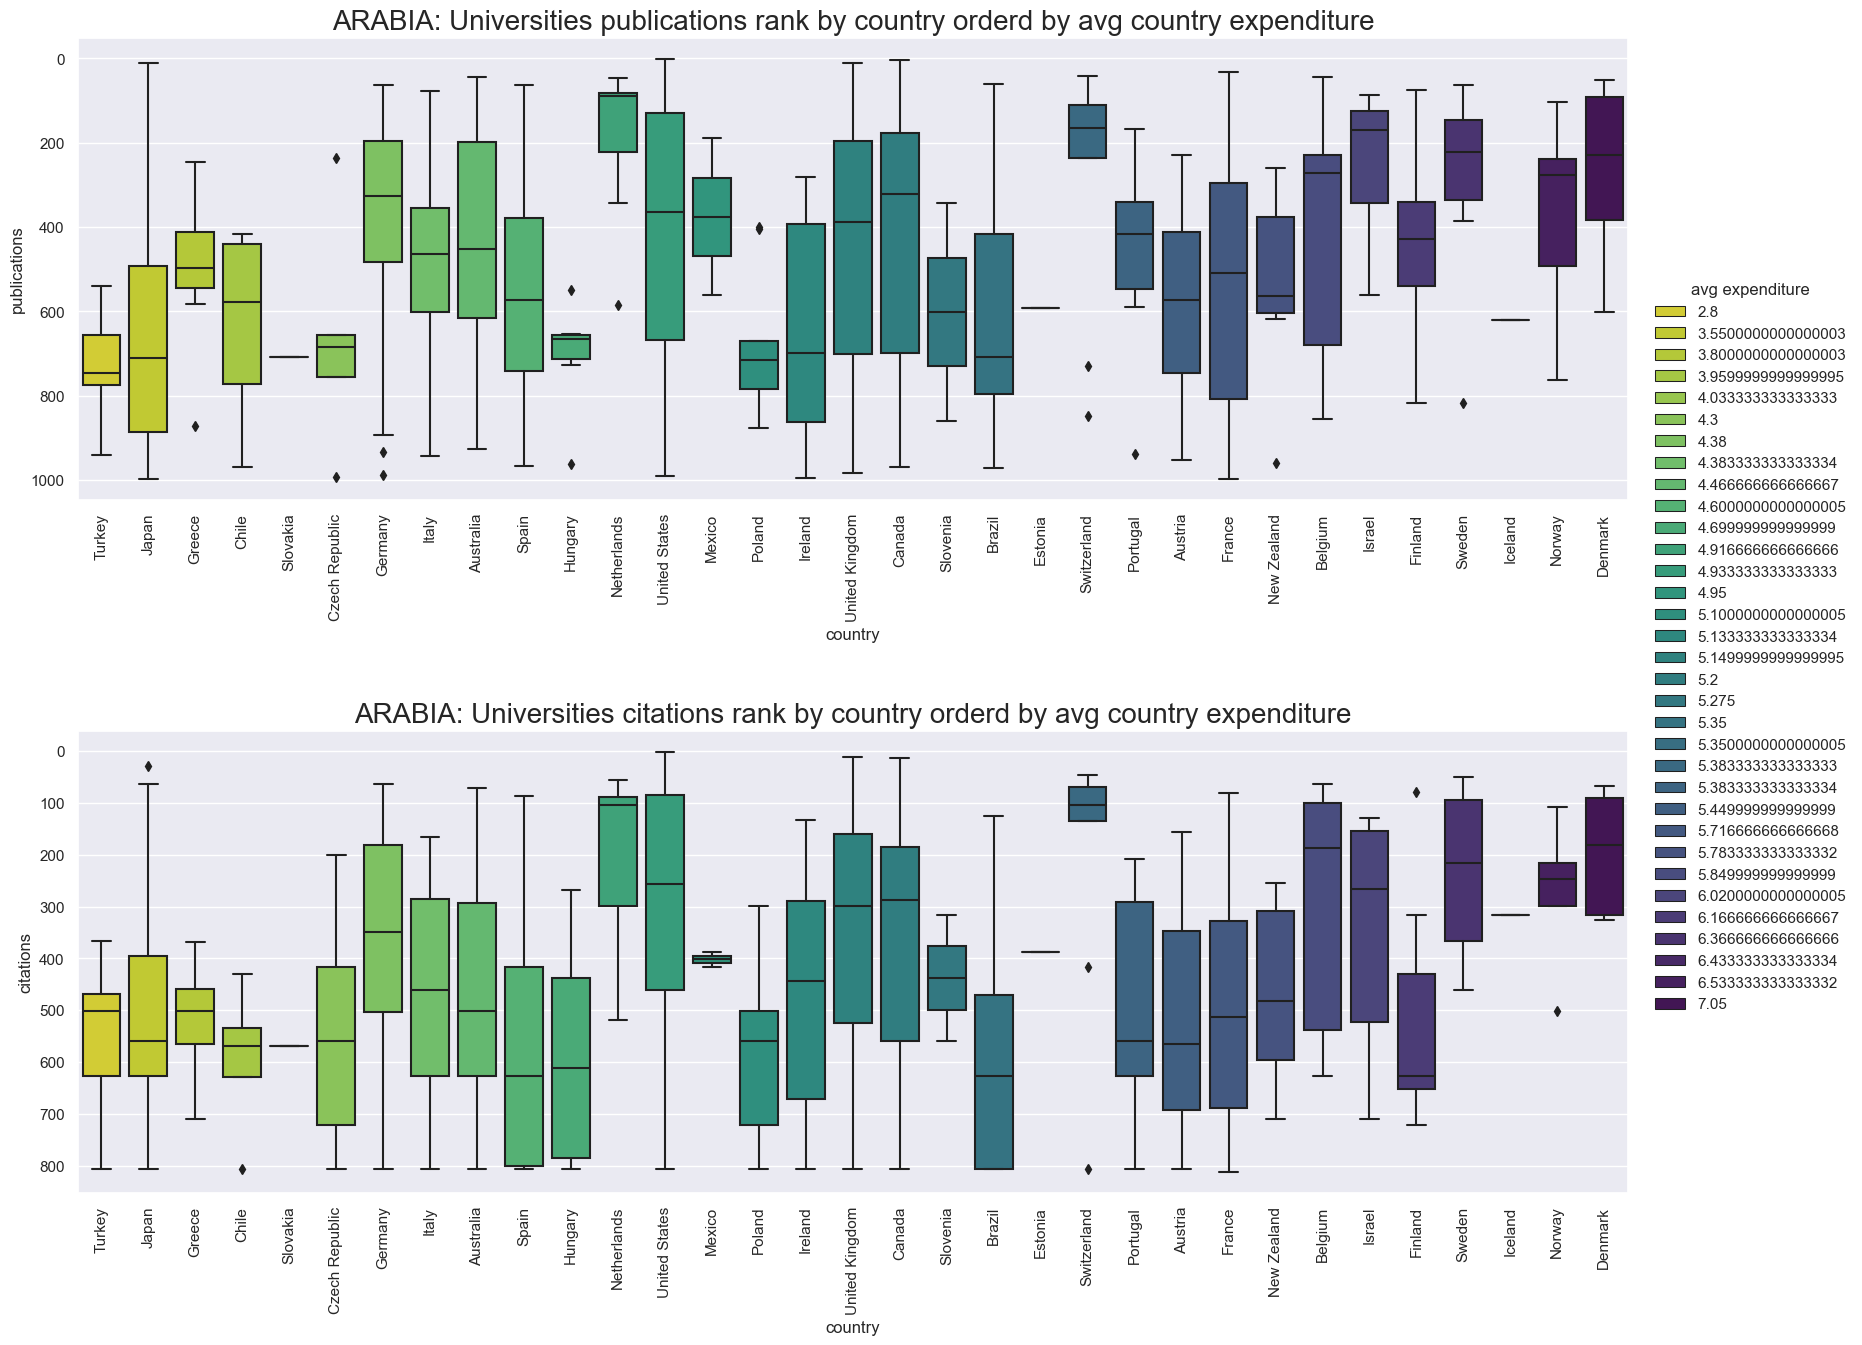

In [85]:
fig, ax = plt.subplots(2,1,  figsize=(20, 15))
ax[0] = sns.boxplot( y="publications", x="country", data=arabia_uni_sample
, hue= 'avg_expenditure',
             palette='viridis_r',  dodge=False, ax = ax[0])
ax[0].tick_params(axis='x', rotation=90)



handles, labels = ax[0].get_legend_handles_labels()

ax[0].legend(handles, labels, ncol=1, loc='upper right', 
                bbox_to_anchor=(1.15, 0.5), title = 'avg expenditure', frameon=False)
ax[0].set_title("ARABIA: Universities publications rank by country orderd by avg country expenditure", fontsize = 20)

ax[0].invert_yaxis()

ax[1]= sns.boxplot( y="citations", x="country", data=arabia_uni_sample
, hue= 'avg_expenditure',
             palette='viridis_r',  dodge=False, ax = ax[1])
ax[1].tick_params(axis='x', rotation=90)



handles, labels = ax[1].get_legend_handles_labels()

ax[1].legend().remove()
ax[1].set_title("ARABIA: Universities citations rank by country orderd by avg country expenditure", fontsize = 20)

ax[1].invert_yaxis()

fig.subplots_adjust(hspace =0.5)

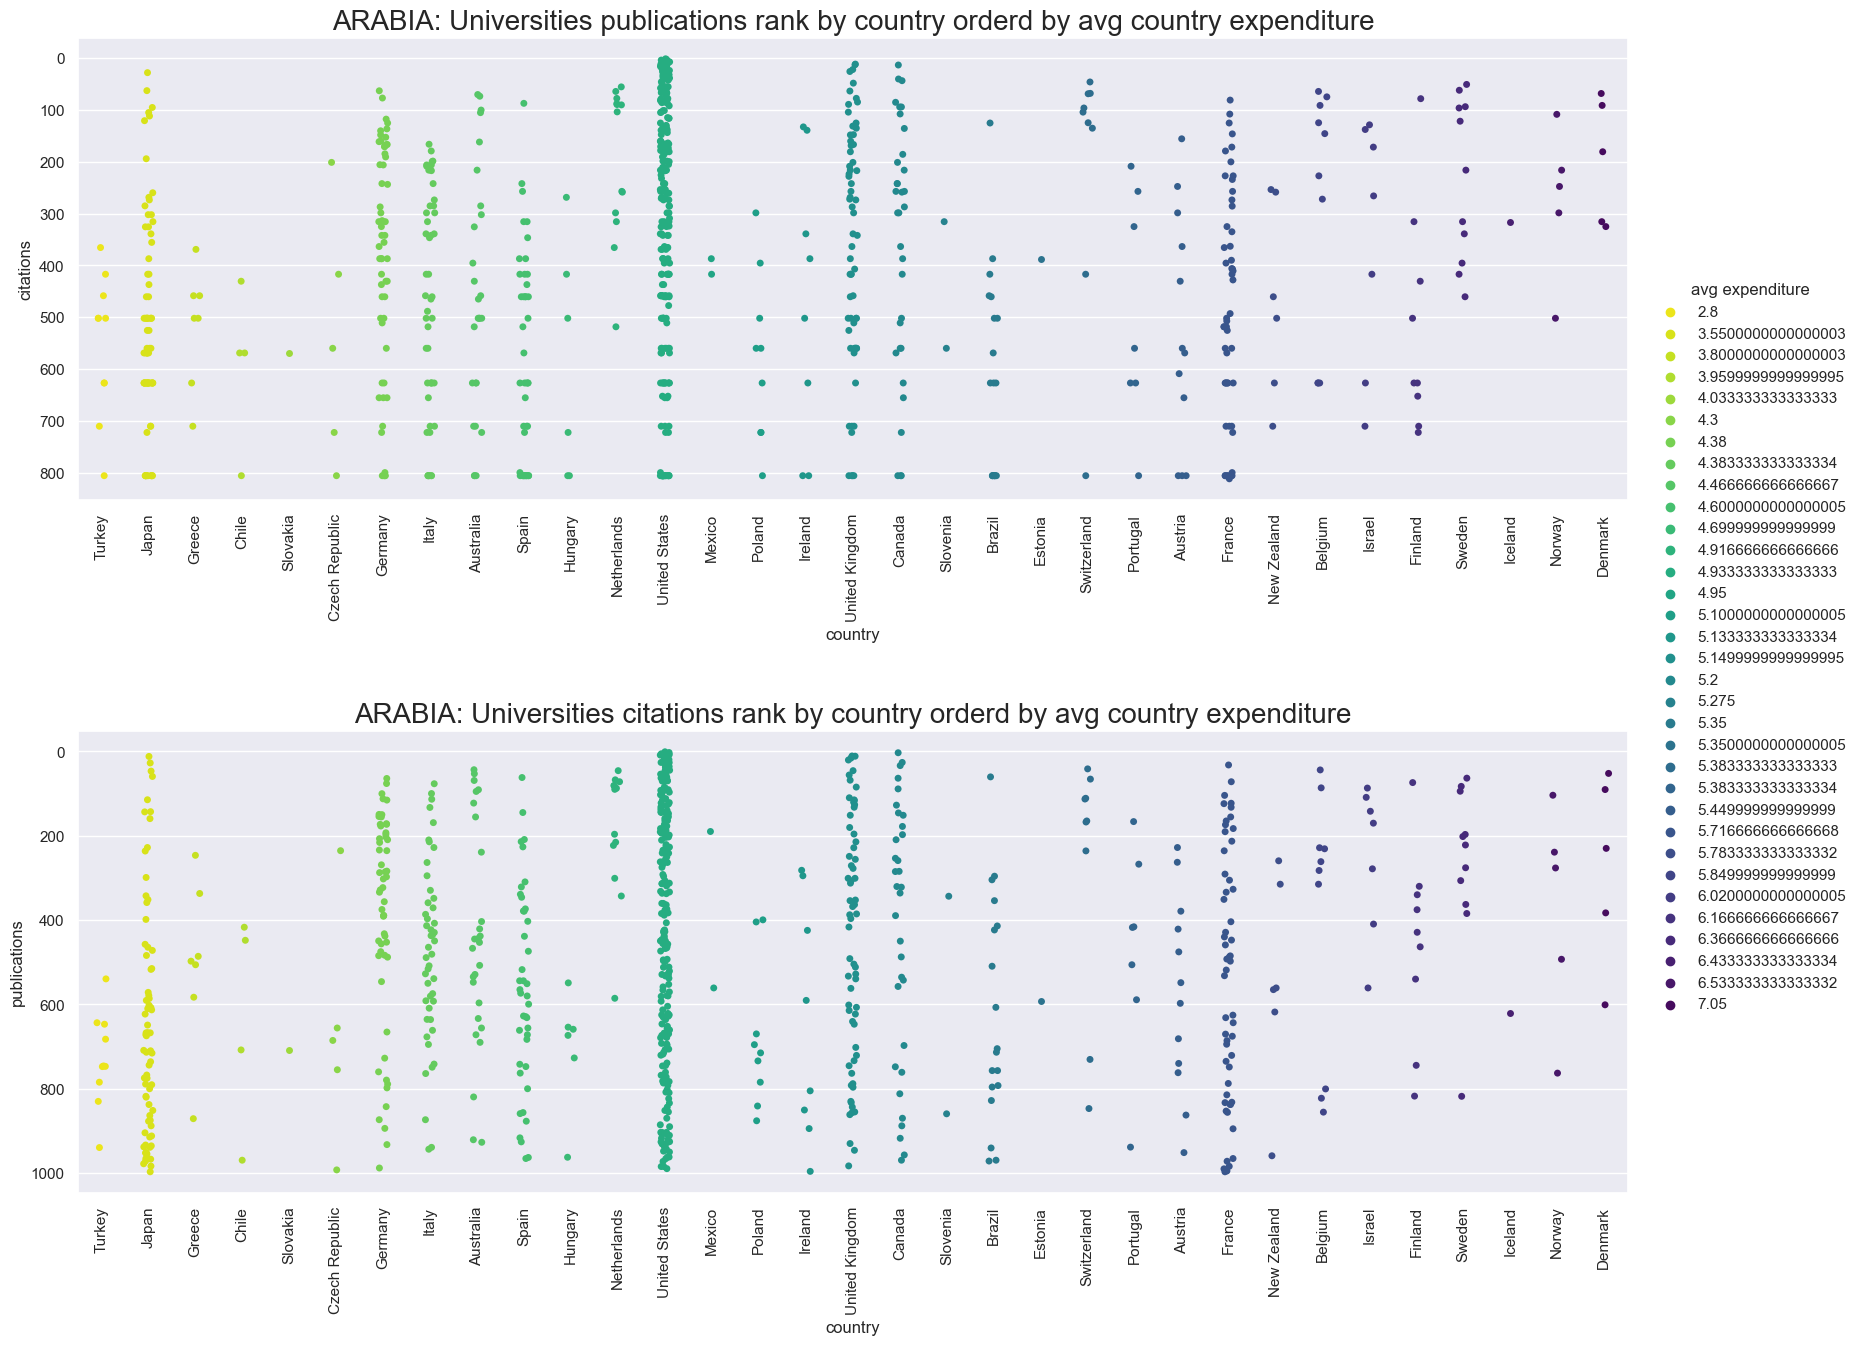

In [86]:
fig, ax = plt.subplots(2,1,  figsize=(20, 15))

ax[0] = sns.stripplot( y="citations", x="country", data=arabia_uni_sample
, hue= 'avg_expenditure', palette=sns.color_palette(palette = 'viridis_r', n_colors = 33), ax = ax[0] )

ax[0].tick_params(axis='x', rotation=90)


handles, labels = ax[0].get_legend_handles_labels()

ax[0].legend(handles, labels, ncol=1, loc='upper right', 
                bbox_to_anchor=(1.15, 0.5), title = 'avg expenditure', frameon=False)
ax[0].set_title("ARABIA: Universities publications rank by country orderd by avg country expenditure", fontsize=20)

ax[0].invert_yaxis()


ax[1] = sns.stripplot( y="publications", x="country", data=arabia_uni_sample
, hue= 'avg_expenditure', palette=sns.color_palette(palette = 'viridis_r', n_colors = 33), ax = ax[1] )

ax[1].tick_params(axis='x', rotation=90)


handles, labels = ax[1].get_legend_handles_labels()
ax[1].legend().remove()


ax[1].set_title("ARABIA: Universities citations rank by country orderd by avg country expenditure", fontsize=20)

ax[1].invert_yaxis()


fig.subplots_adjust(hspace =0.5)

### Results

Given the provided plots the situations is pretty much the same as the overall universities scores, there seems not be a correlation between countries expenditure and universities research scores